In [1]:
library(remotes)
library(dplyr)
library(HandyCNV)
library(tidyr)
library(reshape2)
library(data.table)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr

In [2]:
setwd(dir ="/branchinecta/jbazanwilliamson/RANGE_HG38") #remember to replace the path with your own 

>> QDNASEQ sample

In [3]:
cnvnator.file <- read.csv("/branchinecta/jbazanwilliamson/1_122_QDNASEQ_DATA.csv")
#names(cnvnator.file) <- c('X','CHR', 'START','END','SMPL`','state')

cnvnator.file

X,SAMPLE,CHR,START,END,SIZE,SCORE
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
0,SAMEA3302714,1,12795001,12870000,75000,0
1,SAMEA3302714,1,143535001,143760000,225000,0
2,SAMEA3302714,2,34470001,34515000,45000,0
3,SAMEA3302714,2,219885001,219930000,45000,3
4,SAMEA3302714,4,69255001,69375000,120000,0
5,SAMEA3302714,4,78180001,78330000,150000,0
6,SAMEA3302714,5,46035001,46110000,75000,3
7,SAMEA3302714,6,78255001,78330000,75000,0
8,SAMEA3302714,9,42135001,42180000,45000,0


In [4]:
cnvnator.file$Chr <- as.double(cnvnator.file$CHR)
cnvnator.file$Start <- as.double(cnvnator.file$START)
cnvnator.file$End <- as.double(cnvnator.file$END)
cnvnator.file$CNV_value <- as.double(cnvnator.file$SCORE)
cnvnator.file <- na.omit(cnvnator.file) 

cnvnator.file

cnv = (data.frame(Sample_ID = c(cnvnator.file$SAMPLE),
                  Chr = c(cnvnator.file$Chr),
           Start = c(cnvnator.file$Start),
           End = c(cnvnator.file$End),
           CNV_Value = c(cnvnator.file$CNV_value)))

cnv


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,X,SAMPLE,CHR,START,END,SIZE,SCORE,Chr,Start,End,CNV_value
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,SAMEA3302714,1,12795001,12870000,75000,0,1,12795001,12870000,0
2,1,SAMEA3302714,1,143535001,143760000,225000,0,1,143535001,143760000,0
3,2,SAMEA3302714,2,34470001,34515000,45000,0,2,34470001,34515000,0
4,3,SAMEA3302714,2,219885001,219930000,45000,3,2,219885001,219930000,3
5,4,SAMEA3302714,4,69255001,69375000,120000,0,4,69255001,69375000,0
6,5,SAMEA3302714,4,78180001,78330000,150000,0,4,78180001,78330000,0
7,6,SAMEA3302714,5,46035001,46110000,75000,3,5,46035001,46110000,3
8,7,SAMEA3302714,6,78255001,78330000,75000,0,6,78255001,78330000,0
9,8,SAMEA3302714,9,42135001,42180000,45000,0,9,42135001,42180000,0


Sample_ID,Chr,Start,End,CNV_Value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SAMEA3302714,1,12795001,12870000,0
SAMEA3302714,1,143535001,143760000,0
SAMEA3302714,2,34470001,34515000,0
SAMEA3302714,2,219885001,219930000,3
SAMEA3302714,4,69255001,69375000,0
SAMEA3302714,4,78180001,78330000,0
SAMEA3302714,5,46035001,46110000,3
SAMEA3302714,6,78255001,78330000,0
SAMEA3302714,9,42135001,42180000,0


In [6]:
cnv_standard <- cnv_clean(standard_cnv = cnv, #when running your own data, set this argument by 'standard_cnv = "localpath/file"'
                 drop_length = 5, #the maximum CNV length threshold (in Mb); CNVs larger than this value will be deleted
                 folder = "cnv_clean")

There are 168 individuals with 9793 CNVs in total.
The average number of CNV per individual is 58.29
Basic summary stats by CNV type:
# A tibble: 4 × 5
  CNV_Value     N `Average Length` `Min Length` `Max Length`
      <dbl> <int>            <dbl>        <dbl>        <dbl>
1         0  2555           211841        10000      4815000
2         1  2828           455476         5000      4960000
3         3  4189           391629         5000      4995000
4         4   221           234774        10000      1930000


In [7]:
cnv_visual(clean_cnv = cnv_standard, #standard file was generated by 'cnv_clean' function in section 1
           max_chr = 22, #select how many chromosomes to plot 
           width_1 = 20, #optional,adjust the width of final plot
           height_1 =12, #optional,adjust the height of final plot
           folder = "cnv_visual")

Input data passed requirment check...
[1] "Plotting the CNVs on Chromosome 1"
[1] "Plotting the CNVs on Chromosome 2"
[1] "Plotting the CNVs on Chromosome 3"
[1] "Plotting the CNVs on Chromosome 4"
[1] "Plotting the CNVs on Chromosome 5"
[1] "Plotting the CNVs on Chromosome 6"
[1] "Plotting the CNVs on Chromosome 7"
[1] "Plotting the CNVs on Chromosome 8"
[1] "Plotting the CNVs on Chromosome 9"
[1] "Plotting the CNVs on Chromosome 10"
[1] "Plotting the CNVs on Chromosome 11"
[1] "Plotting the CNVs on Chromosome 12"
[1] "Plotting the CNVs on Chromosome 13"
[1] "Plotting the CNVs on Chromosome 14"
[1] "Plotting the CNVs on Chromosome 15"
[1] "Plotting the CNVs on Chromosome 16"
[1] "Plotting the CNVs on Chromosome 17"
[1] "Plotting the CNVs on Chromosome 18"
[1] "Plotting the CNVs on Chromosome 19"
[1] "Plotting the CNVs on Chromosome 20"
[1] "Plotting the CNVs on Chromosome 21"
[1] "Plotting the CNVs on Chromosome 22"
Task done.


In [8]:
cnv_summary_plot(clean_cnv = cnv_standard, #standard file was generated by 'cnv_clean' function in section 1
                 length_group = c(0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 5), # optional, set group of vectors to divide CNV length, unit is Mb. such as vector of ‘c(0.05, 0.3, 1)’, means divide the CNV length into four group: '<0.05Mb', '0.05 - 0.3Mb', '0.3-1Mb' and '>1Mb', maximum can accept 11 valueses
                 col_0 = "red", #optional, customize color for o copy CNV 
                 col_1 = "black", #optional, customize color for o copy CNV 
                 col_3 = "purple", #optional, customize color for o copy CNV 
                 col_4 = "blue", #optional, customize color for o copy CNV 
                 plot_sum_1 = TRUE,  #optional, make sum combination plot 1
                 height_sum1 = 26, #optional, adjust the size of sum plot 1
                 width_sum1 = 20, #optional, adjust the size of sum plot 1
                 plot_sum_2 = TRUE, #optional, make sum combination plot 2
                 height_sum2 = 20, #optional, adjust the size of sum plot 2
                 width_sum2 = 27, #optional, adjust the size of sum plot 2
                 folder = "cnv_summary_plot_cnvnator")

Deviding the length group...
Plotting...
The CNV distribution plot has been saved in the 'cnv_summary_plot_cnvnator' directory.
The CNV length group plot was saved in the 'cnv_summary_plot_cnvnator' directory.
The box plot of CNV lengths was saved in the 'cnv_summary_plot_cnvnator' directory.
Distribution of CNV type on chromosome plot was saved in working directory.
The number of CNV in Individual plot was saved in working directory.
cnv_summary_plot_1 was saved in working directory.
cnv_summaray_polt_2 was saved in working directory.
Task done.


In [9]:

#cnv_visual(clean_cnv = cnv_standard, #standard file was generated by 'cnv_clean' function in section 1
#           individual_id = "LP6005441-DNA_A01", #set the sample ID  
#           width_1 = 20, #optional, adjust the width of final plot
#           height_1 = 13, #optional. adjust the height of final plot
#           folder = "cnv_visual_LP6005441-DNA_A01")

In [10]:
cnvr_cnvnator <- call_cnvr(clean_cnv = cnv_standard, #standard file was generated by 'cnv_clean' function in section 1
                  chr_set = 26, #Set the maximum number of chromosomes (29 autosomes for cattle)
                  folder = "cnvr_cnvnator")


Chromosome 1 has been processed.
Chromosome 2 has been processed.
Chromosome 3 has been processed.
Chromosome 4 has been processed.
Chromosome 5 has been processed.
Chromosome 6 has been processed.
Chromosome 7 has been processed.
Chromosome 8 has been processed.
Chromosome 9 has been processed.
Chromosome 10 has been processed.
Chromosome 11 has been processed.
Chromosome 12 has been processed.
Chromosome 13 has been processed.
Chromosome 14 has been processed.
Chromosome 15 has been processed.
Chromosome 16 has been processed.
Chromosome 17 has been processed.
Chromosome 18 has been processed.
Chromosome 19 has been processed.
Chromosome 20 has been processed.
Chromosome 21 has been processed.
Chromosome 22 has been processed.
No CNVs detected on Chromosome23.
No CNVs detected on Chromosome24.
No CNVs detected on Chromosome25.
No CNVs detected on Chromosome26.
2179 CNVRs generated in total.
Overall summary of CNVRs:
# A tibble: 3 × 6
  Type      N `Average Length` `Min Length` `Max L

In [11]:
cnvr_cnvnator

CNVR_ID,Chr,Start,End,Frequency,n_Sample,0,1,3,4,Type,Length
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
CNVR_1,1,85001,4235000,31,30,11,8,10,2,Mixed,4150000
CNVR_2,1,4235001,4260000,1,1,NA,1,NA,NA,Loss,25000
CNVR_3,1,5050001,5070000,1,1,NA,1,NA,NA,Loss,20000
CNVR_4,1,6705001,6770000,1,1,NA,1,NA,NA,Loss,65000
CNVR_5,1,6770001,6830000,1,1,NA,NA,1,NA,Gain,60000
CNVR_6,1,7845001,8305000,1,1,1,NA,NA,NA,Loss,460000
CNVR_7,1,8305001,10580000,5,5,NA,2,3,NA,Mixed,2275000
CNVR_8,1,11975001,12215000,2,2,NA,NA,2,NA,Gain,240000
CNVR_9,1,12775001,13610000,64,53,29,19,15,1,Mixed,835000


In [12]:
get_refgene()

Please select which version to download from following list:
 [1] "Cow_ARS_UCSC"            "Cow_ARS_ENS"            
 [3] "Cow_UMD_UCSC"            "Pig_susScr11_UCSC"      
 [5] "Pig_susScr11_ENS"        "Human_hg38"             
 [7] "Human_hg19"              "Sheep_Oar_v4.0_UCSC"    
 [9] "Sheep_Oar_v3.1_UCSC"     "Sheep_Oar_v3.1_ENS"     
[11] "Horse_equCab3.0_UCSC"    "Horse_equCab2.0_UCSC"   
[13] "Dog_UMICH_Zoey_3.1_UCSC" "Dog_UMICH_Zoey_3.1_ENS" 
[15] "Chicken_galGal6_UCSC"    "Chicken_galGal5_UCSC"   


In [13]:
Human_hg38 <- get_refgene(gene_version = "Human_hg38")

Link to the website...
Converting format...
Task done.


In [14]:
call_gene(refgene = "refgene/Human_hg38.txt", #standard file was generated by 'get_refgene' function in section 5.1
          interval = cnvr_cnvnator, #optional, standard file was generated by 'call_cnvr' function in section 4
          clean_cnv = cnv_standard, #optional, standard file was generated by 'cnv_clean' function in section 1
          folder = "call_gene_CNVNator_Hg38")

Checking gene annotation status in the interval file...
Summary of annotation results:
  Interval_Has_Gene Interval_Without_Gene Total_Number_of_Genes
1              1797                   382                 15305
Checking gene annotation status in CNV file...
15305 genes were matched in the CNV and CNVR results. The 10 most frequent genes:
# A tibble: 10 × 2
# Groups:   name2 [10]
   name2     Frequency
   <chr>         <int>
 1 OR4K1            88
 2 OR4K2            88
 3 OR4K3            88
 4 OR4K5            88
 5 OR4M1            88
 6 OR4N2            88
 7 OR4Q3            88
 8 CNTNAP3B         79
 9 FAM74A7          75
10 SPATA31A6        75


Warning message in call_gene(refgene = "refgene/Human_hg38.txt", interval = cnvr_cnvnator, :
“The following genes are duplicated in multiple CNVRs, and will only be annotated on the first CNVR_ID in the final gene frequency list report!
”


        name2        ID Chr  i.Start    i.End
  1: RNVU1-18   CNVR_14   1 16205001 16975000
  2:   RNU1-3   CNVR_14   1 16205001 16975000
  3:   RNU1-4   CNVR_14   1 16205001 16975000
  4:   RNU1-2   CNVR_14   1 16205001 16975000
  5:   RNU1-1   CNVR_14   1 16205001 16975000
 ---                                         
299:  BMS1P18 CNVR_2154  22 10665001 16185000
300:  BMS1P17 CNVR_2154  22 10665001 16185000
301:  BMS1P22 CNVR_2154  22 10665001 16185000
302:    TTC28 CNVR_2163  22 28045001 28080000
303:    TTC28 CNVR_2164  22 28520001 30445000


name2,Frequency,ID,Chr,CNVR_Start,CNVR_End
<chr>,<int>,<chr>,<int>,<dbl>,<dbl>
OR4K1,88,CNVR_1645,14,18675001,19965000
OR4K2,88,CNVR_1645,14,18675001,19965000
OR4K3,88,CNVR_1645,14,18675001,19965000
OR4K5,88,CNVR_1645,14,18675001,19965000
OR4M1,88,CNVR_1645,14,18675001,19965000
OR4N2,88,CNVR_1645,14,18675001,19965000
OR4Q3,88,CNVR_1645,14,18675001,19965000
CNTNAP3B,79,CNVR_1184,9,38995001,43195000
FAM74A7,75,CNVR_1184,9,38995001,43195000


In [15]:
cnvr_plot(cnvr = "cnvr_cnvnator/cnvr.txt", #standard file was generated by 'call_cnvr' function in section 4
          assembly = "Homo Sapiens", #cattle could select 'UMD' or 'ARS', other species could assign the name of species
          loss_col = "green2", #optional, adjust the color of Loss type of CNVR
          gain_col = "red", #optional, adjust the color of Gain type of CNVR
          mixed_col = "black",  #optional, adjust the color of Mixed type of CNVR
          legend_x = 127, #optional, adjust the horizontal position of legend
          legend_y = 30,  #optional, adjust the vertical position of legend
          #height_1 = 14, #optional, adjust the height of CNVR plot
          #width_1 = 10, #optional, adjust the width of CNVR plot
          folder = "cnvr_plot_cnvnator")

Task done, CNVR Distribution Plot saved in working directory.


There 44 high frequency CNVR passed the customized threshold.
[1] "Ploting CNVR 1..."
Input data passed requirment check...
[1] "CNV on Chromosome 1: 12.775001 - 13.61 Mb with 53 Individual - "
Plotting gene...


Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


Task done, plot was stored in working directory.
[1] "Ploting CNVR 2..."
Input data passed requirment check...
[1] "CNV on Chromosome 1: 25.260001 - 25.425 Mb with 49 Individual - "
Plotting gene...


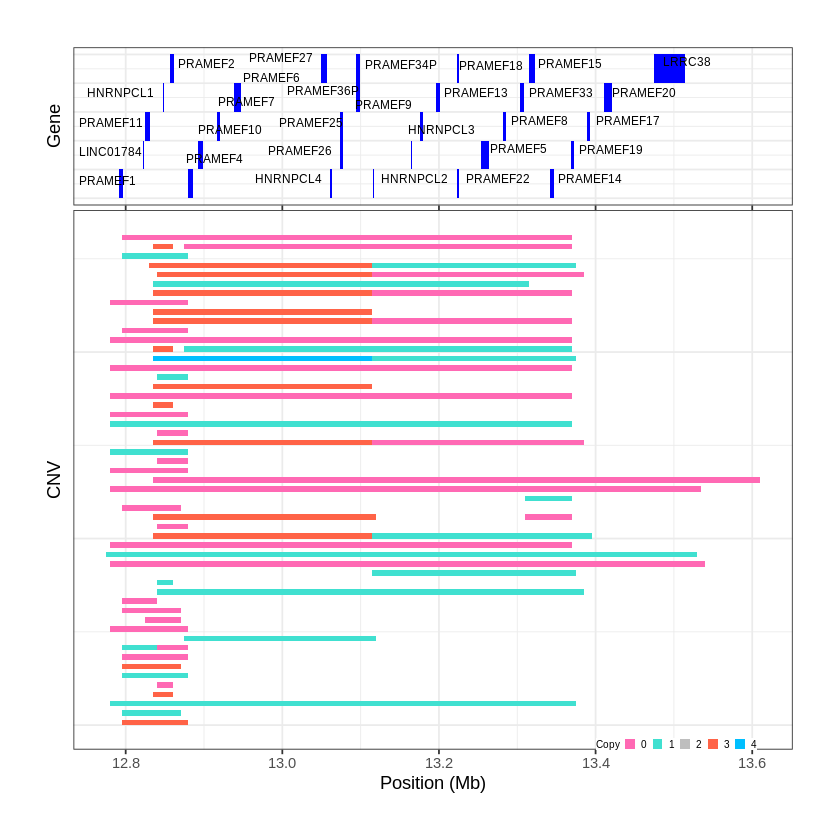

Task done, plot was stored in working directory.
[1] "Ploting CNVR 3..."
Input data passed requirment check...
[1] "CNV on Chromosome 1: 143.205001 - 145.69 Mb with 49 Individual - "
Plotting gene...


Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


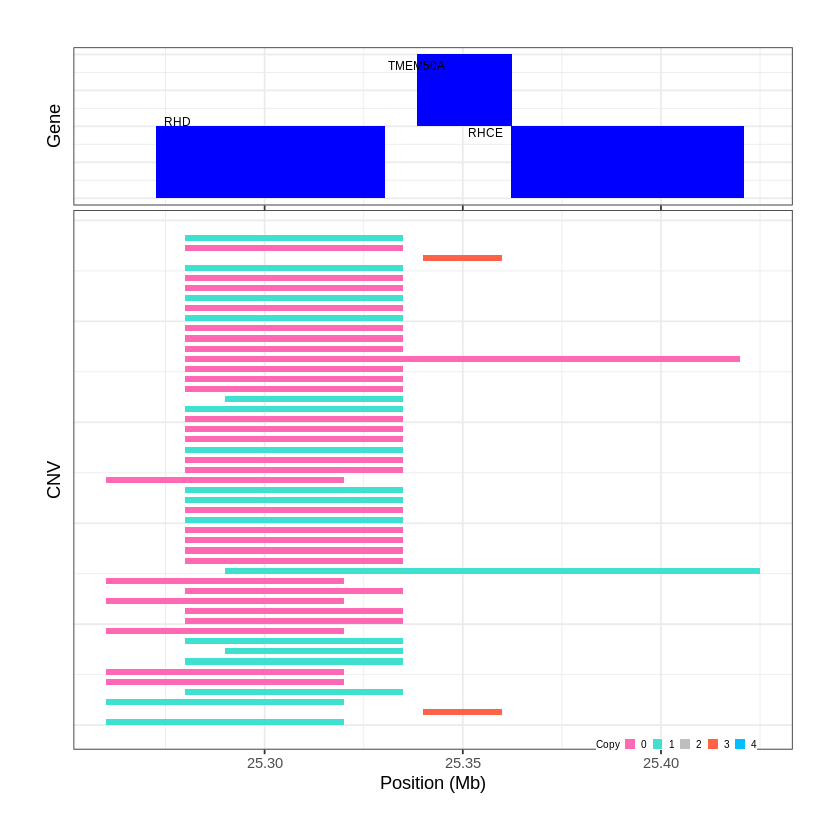

Task done, plot was stored in working directory.
[1] "Ploting CNVR 4..."
Input data passed requirment check...
[1] "CNV on Chromosome 1: 158.365001 - 161.965 Mb with 61 Individual - "
Plotting gene...


Warning message:
“ggrepel: 32 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


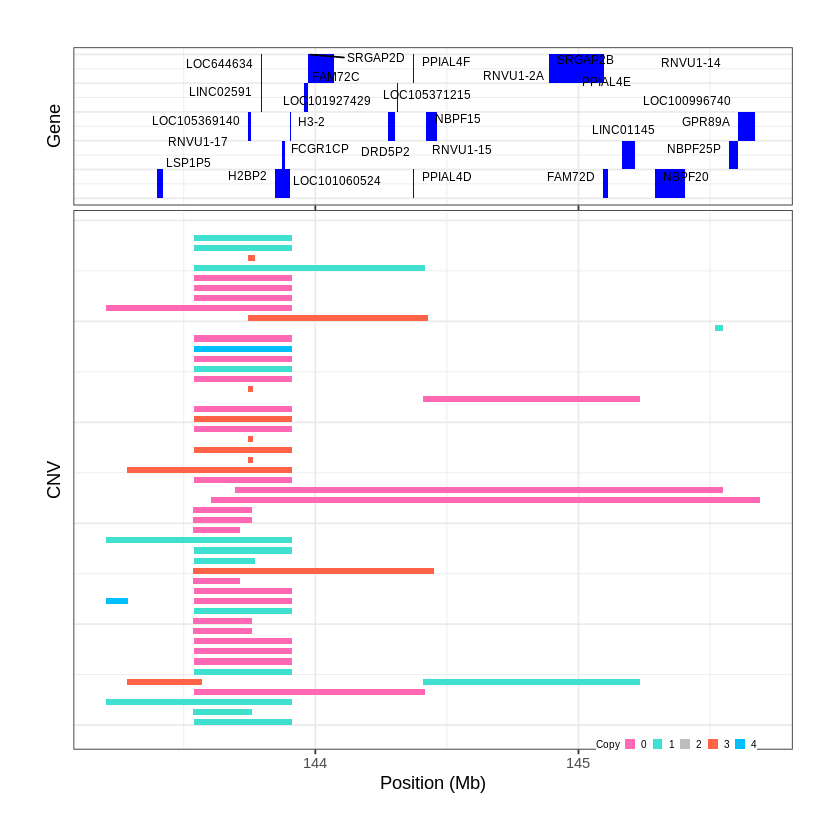

Task done, plot was stored in working directory.
[1] "Ploting CNVR 5..."
Input data passed requirment check...
[1] "CNV on Chromosome 1: 248.525001 - 248.93 Mb with 40 Individual - "
Plotting gene...
Task done, plot was stored in working directory.
[1] "Ploting CNVR 6..."
Input data passed requirment check...
[1] "CNV on Chromosome 2: 34.470001 - 34.515 Mb with 49 Individual - "
Plotting gene...
[1] "No gene in this region"


Warning message in as_grob.default(plot):
“Cannot convert object of class character into a grob.”


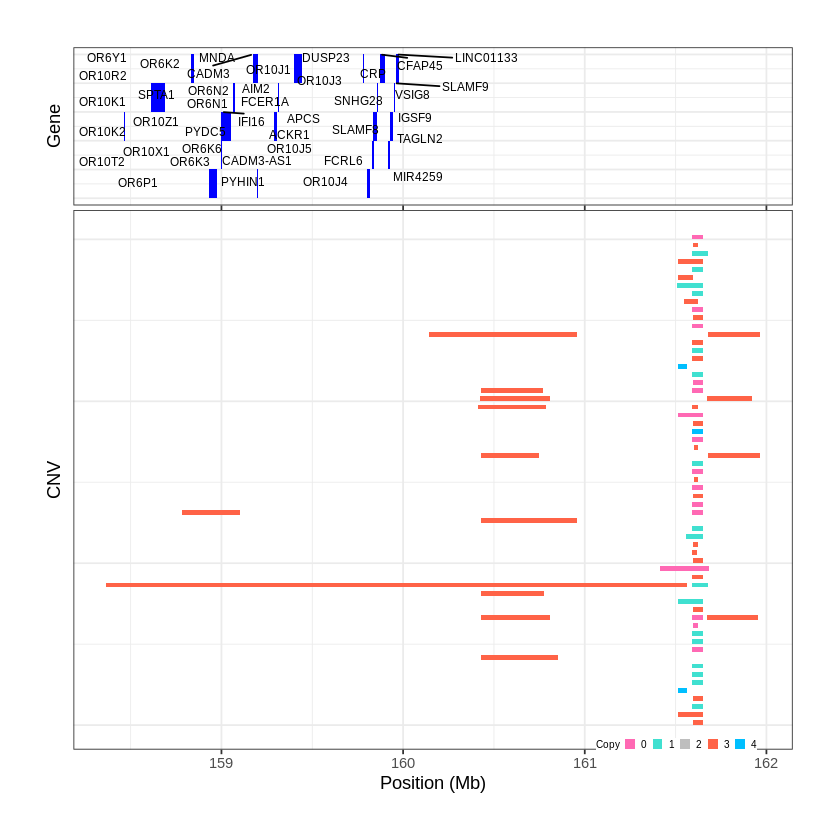

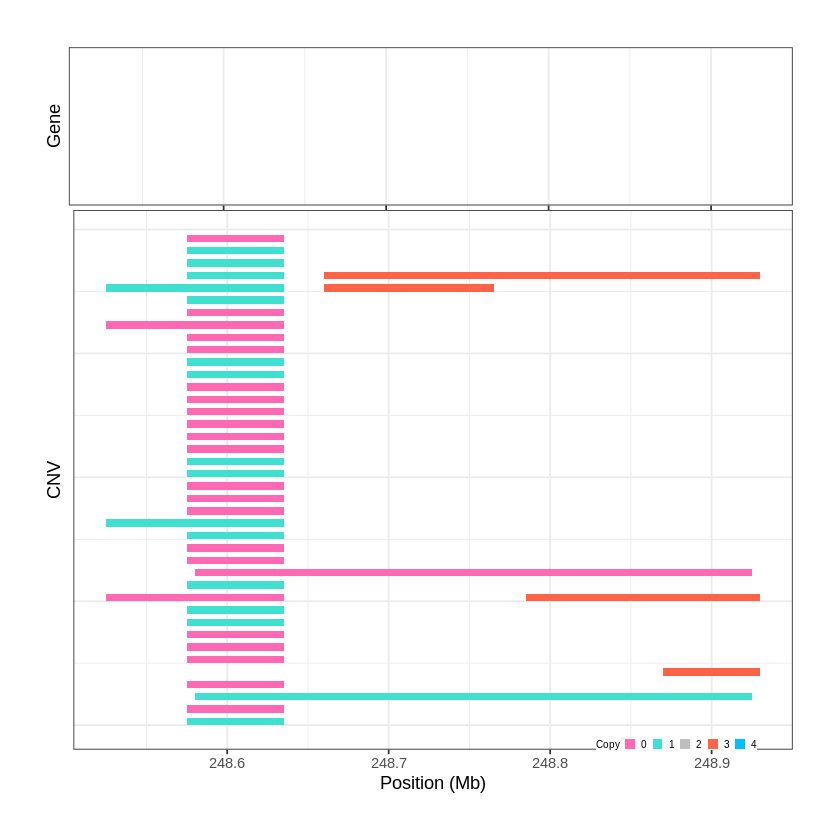

Task done, plot was stored in working directory.
[1] "Ploting CNVR 7..."
Input data passed requirment check...
[1] "CNV on Chromosome 2: 89.030001 - 94.75 Mb with 60 Individual - "
Plotting gene...


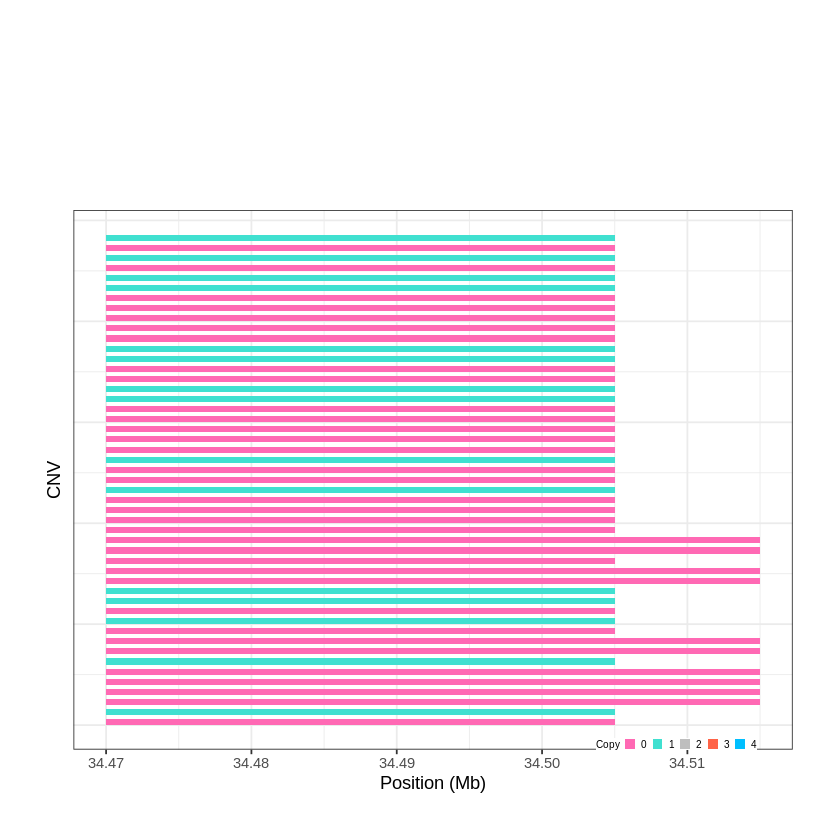

Task done, plot was stored in working directory.
[1] "Ploting CNVR 8..."
Input data passed requirment check...
[1] "CNV on Chromosome 2: 136.000001 - 147.78 Mb with 46 Individual - "
Plotting gene...


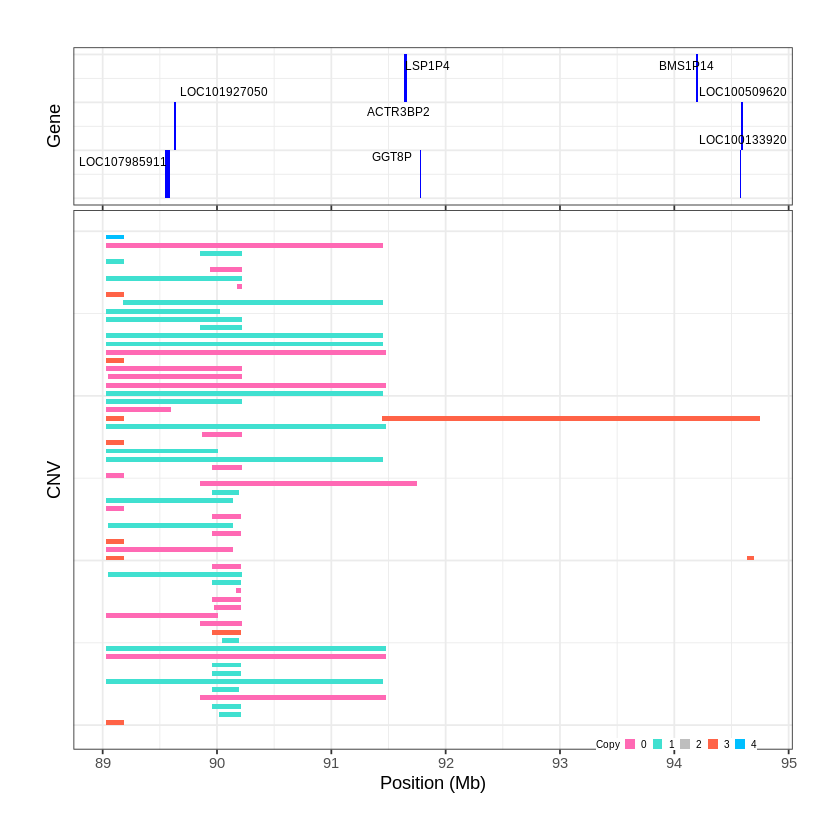

Task done, plot was stored in working directory.
[1] "Ploting CNVR 9..."
Input data passed requirment check...
[1] "CNV on Chromosome 3: 90.145001 - 98.285 Mb with 70 Individual - "
Plotting gene...


Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


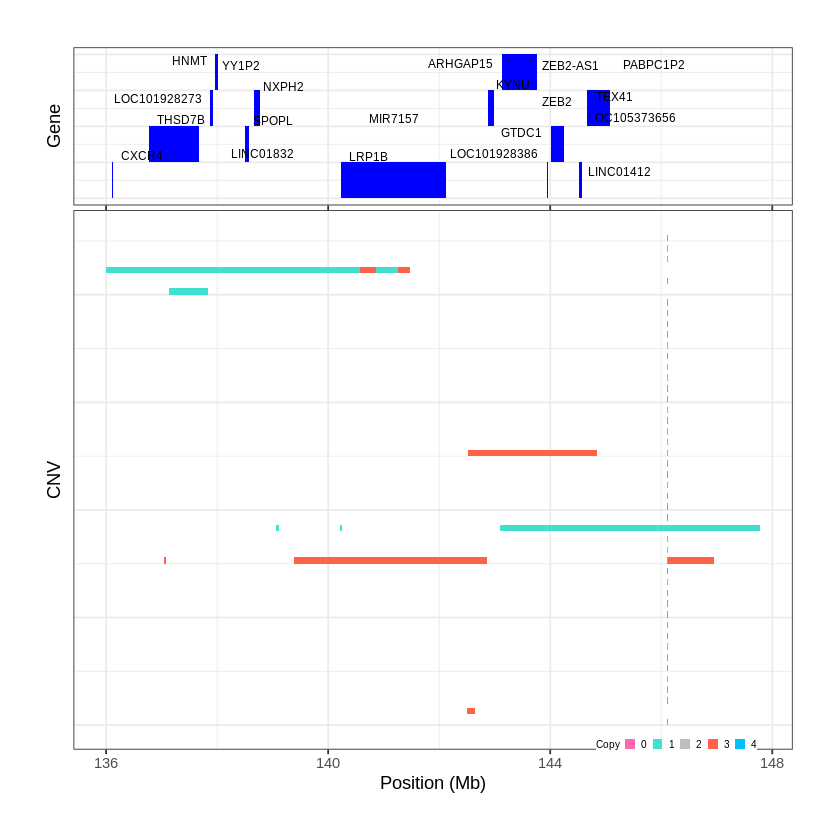

Task done, plot was stored in working directory.
[1] "Ploting CNVR 10..."
Input data passed requirment check...
[1] "CNV on Chromosome 3: 124.495001 - 126.005 Mb with 68 Individual - "
Plotting gene...


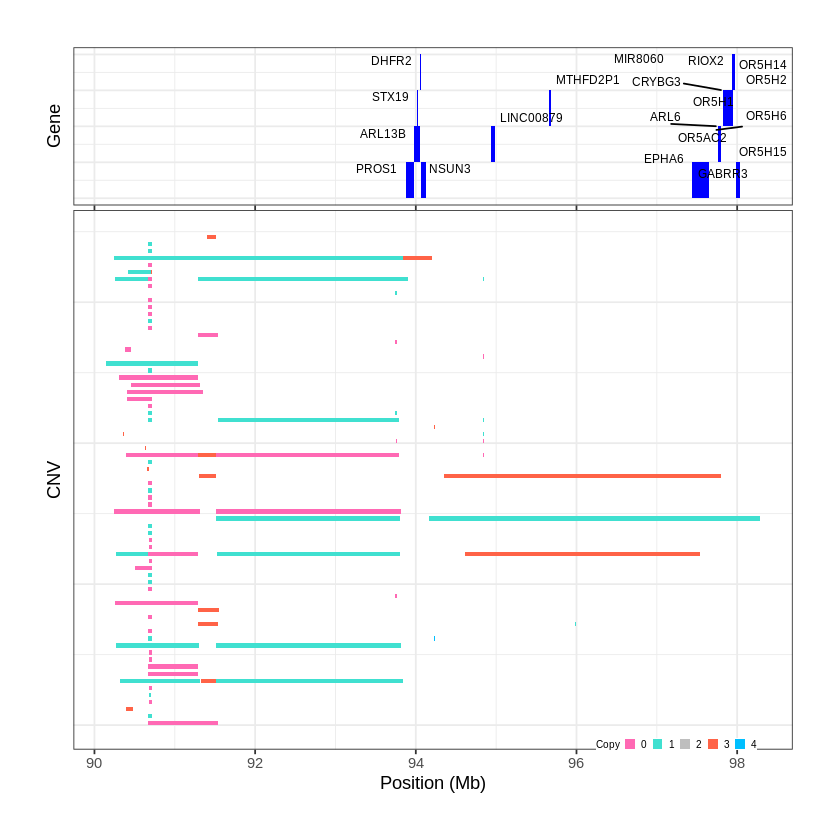

Task done, plot was stored in working directory.
[1] "Ploting CNVR 11..."
Input data passed requirment check...
[1] "CNV on Chromosome 4: 31.275001 - 36.695 Mb with 54 Individual - "
Plotting gene...


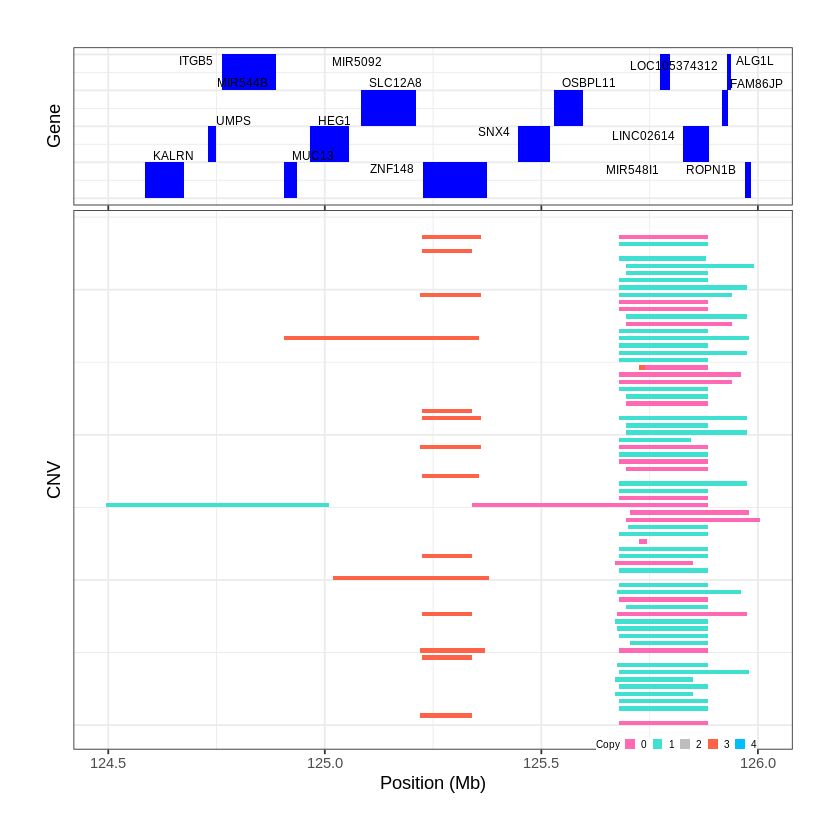

Task done, plot was stored in working directory.
[1] "Ploting CNVR 12..."
Input data passed requirment check...
[1] "CNV on Chromosome 4: 63.825001 - 66.92 Mb with 45 Individual - "
Plotting gene...


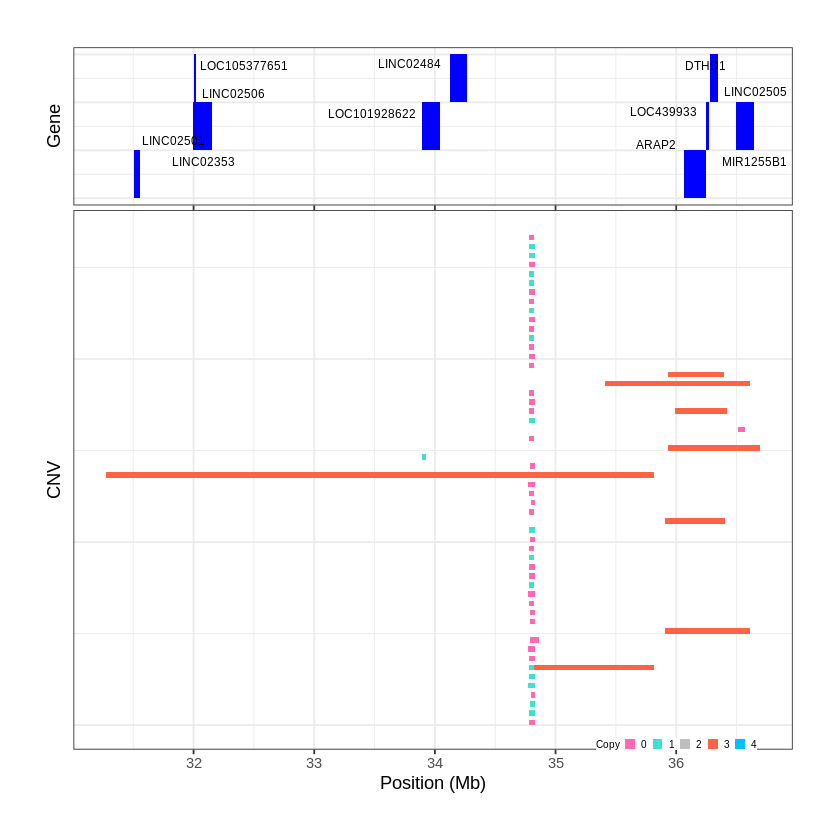

Task done, plot was stored in working directory.
[1] "Ploting CNVR 13..."
Input data passed requirment check...
[1] "CNV on Chromosome 4: 68.745001 - 70.43 Mb with 62 Individual - "
Plotting gene...


Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


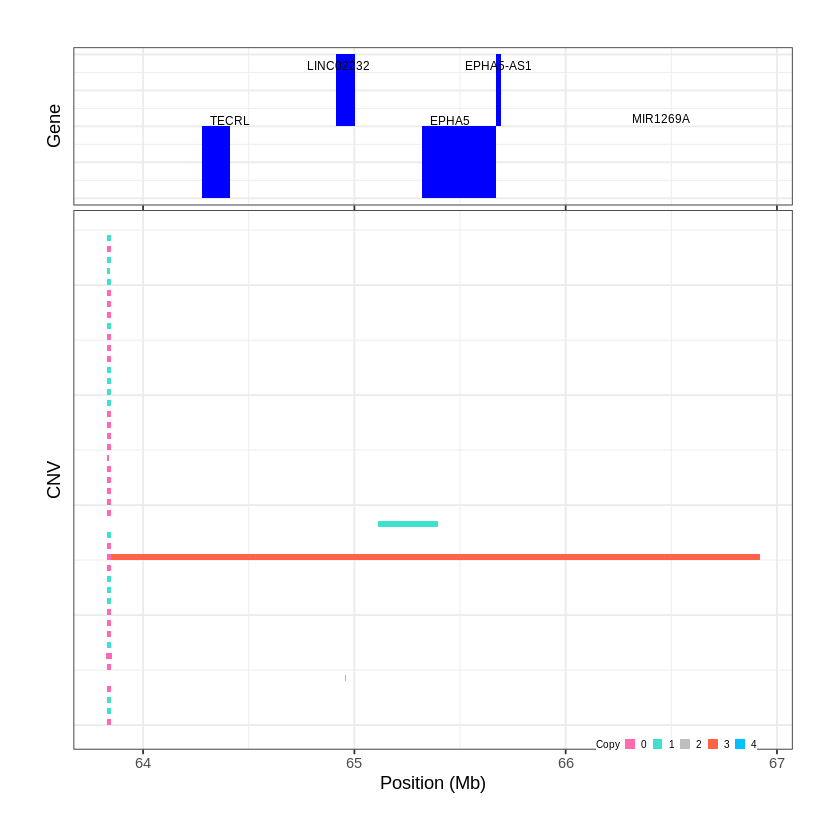

Task done, plot was stored in working directory.
[1] "Ploting CNVR 14..."
Input data passed requirment check...
[1] "CNV on Chromosome 5: 0.015001 - 1.59 Mb with 70 Individual - "
Plotting gene...


Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


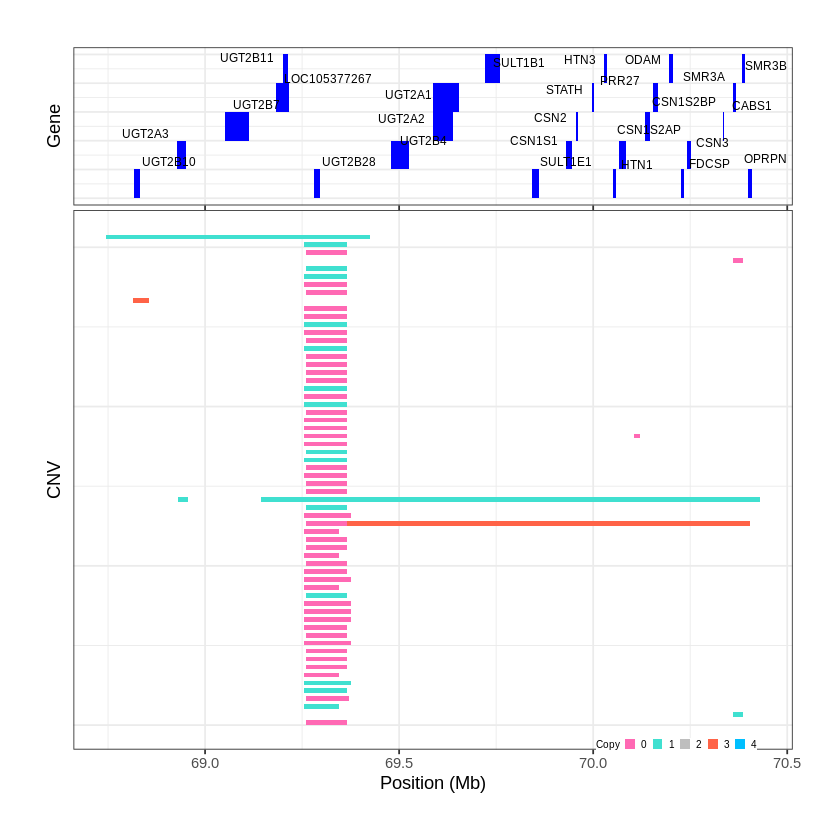

Task done, plot was stored in working directory.
[1] "Ploting CNVR 15..."
Input data passed requirment check...
[1] "CNV on Chromosome 5: 180.945001 - 181.29 Mb with 48 Individual - "
Plotting gene...


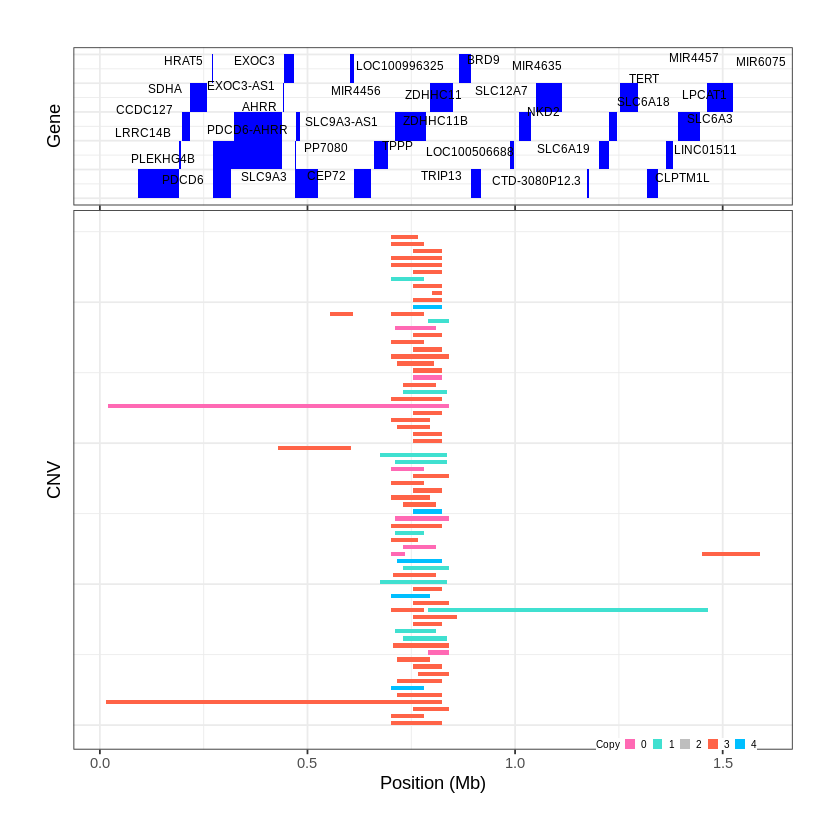

Task done, plot was stored in working directory.
[1] "Ploting CNVR 16..."
Input data passed requirment check...
[1] "CNV on Chromosome 6: 29.125001 - 29.99 Mb with 52 Individual - "
Plotting gene...


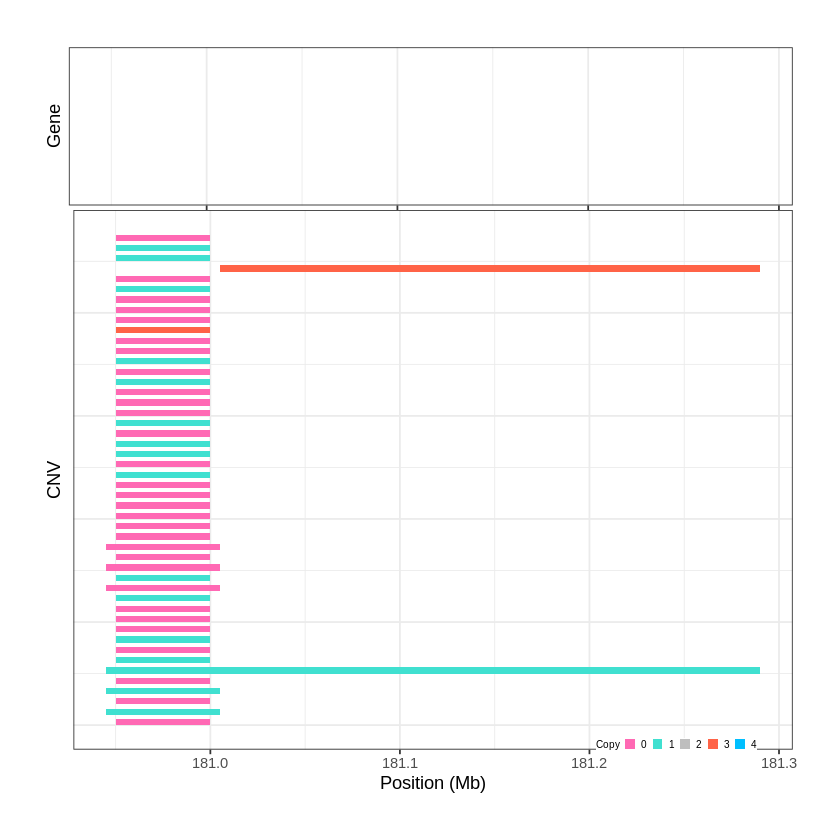

Task done, plot was stored in working directory.
[1] "Ploting CNVR 17..."
Input data passed requirment check...
[1] "CNV on Chromosome 6: 76.040001 - 78.615 Mb with 49 Individual - "
Plotting gene...


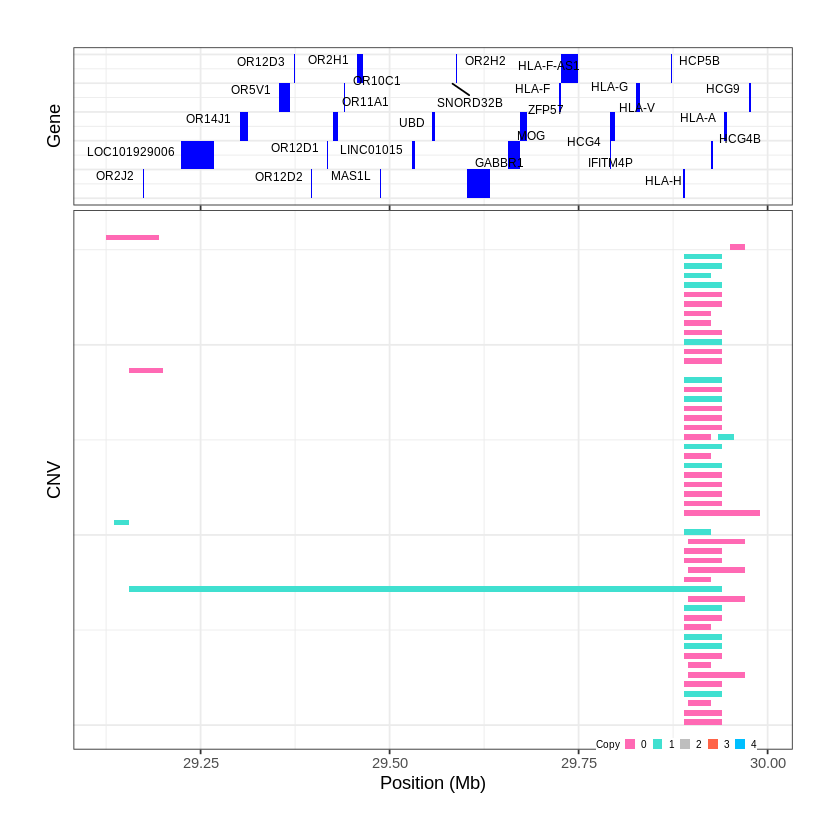

Task done, plot was stored in working directory.
[1] "Ploting CNVR 18..."
Input data passed requirment check...
[1] "CNV on Chromosome 7: 52.680001 - 69.615 Mb with 68 Individual - "
Plotting gene...


Warning message:
“ggrepel: 42 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 95 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


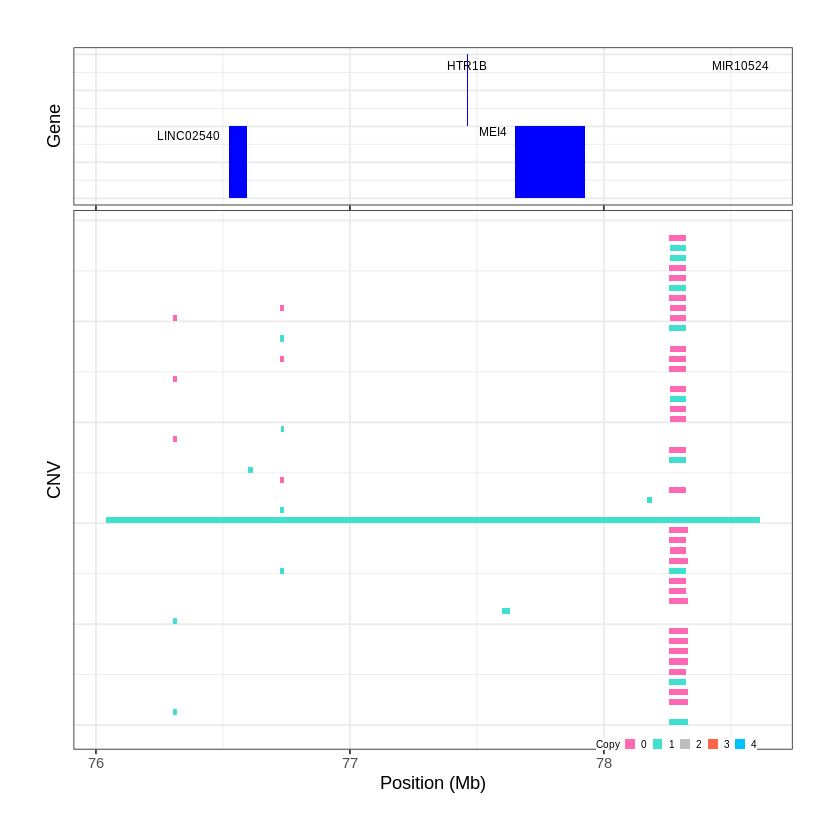

Task done, plot was stored in working directory.
[1] "Ploting CNVR 19..."
Input data passed requirment check...
[1] "CNV on Chromosome 7: 151.970001 - 154.44 Mb with 37 Individual - "
Plotting gene...
Task done, plot was stored in working directory.
[1] "Ploting CNVR 20..."
Input data passed requirment check...
[1] "CNV on Chromosome 8: 6.375001 - 9.755 Mb with 51 Individual - "
Plotting gene...


Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


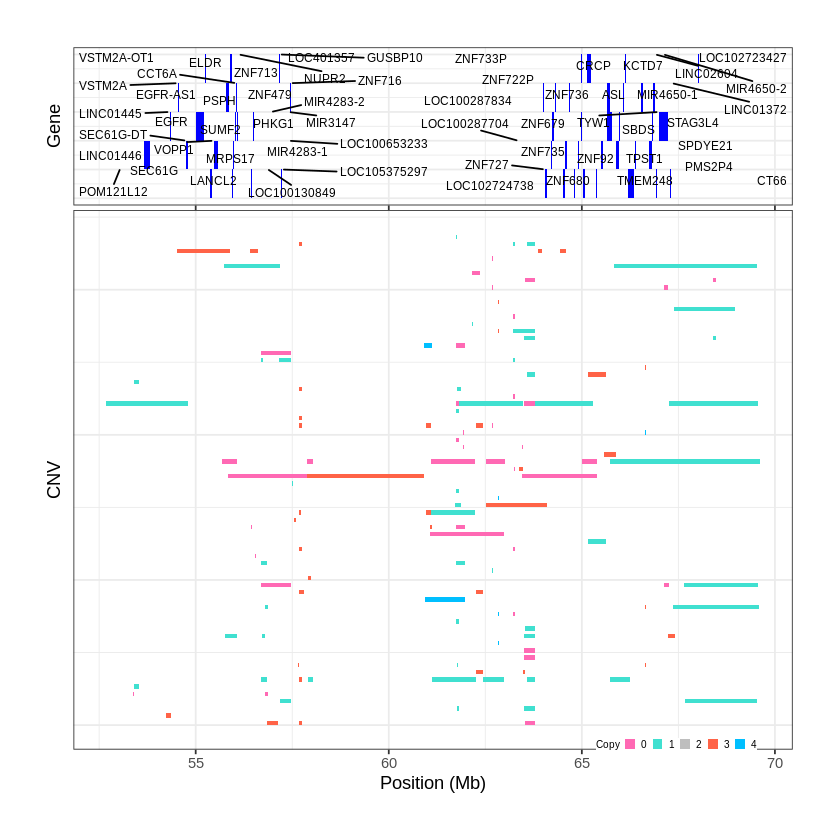

Warning message:
“ggrepel: 54 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


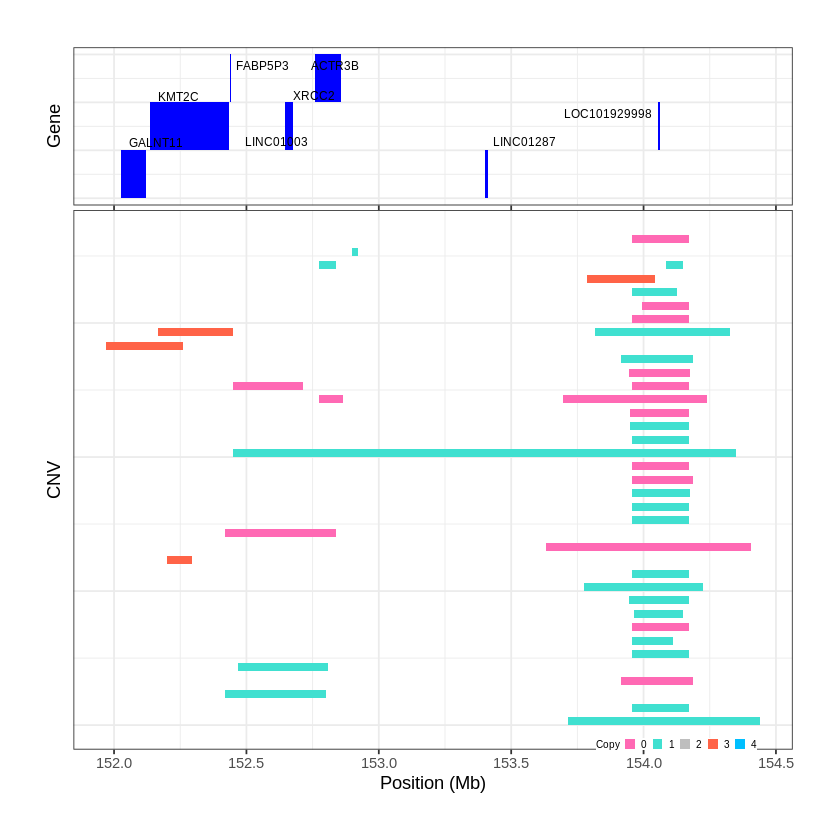

Task done, plot was stored in working directory.
[1] "Ploting CNVR 21..."
Input data passed requirment check...
[1] "CNV on Chromosome 8: 11.770001 - 12.645 Mb with 81 Individual - "
Plotting gene...


Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


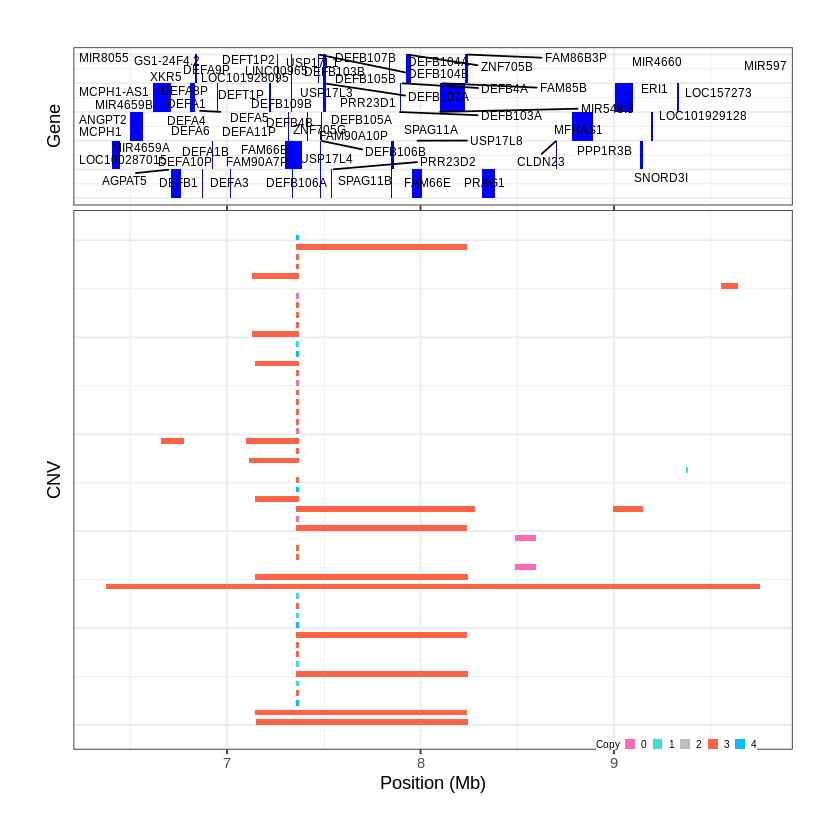

Task done, plot was stored in working directory.
[1] "Ploting CNVR 22..."
Input data passed requirment check...
[1] "CNV on Chromosome 8: 38.725001 - 39.5 Mb with 73 Individual - "
Plotting gene...


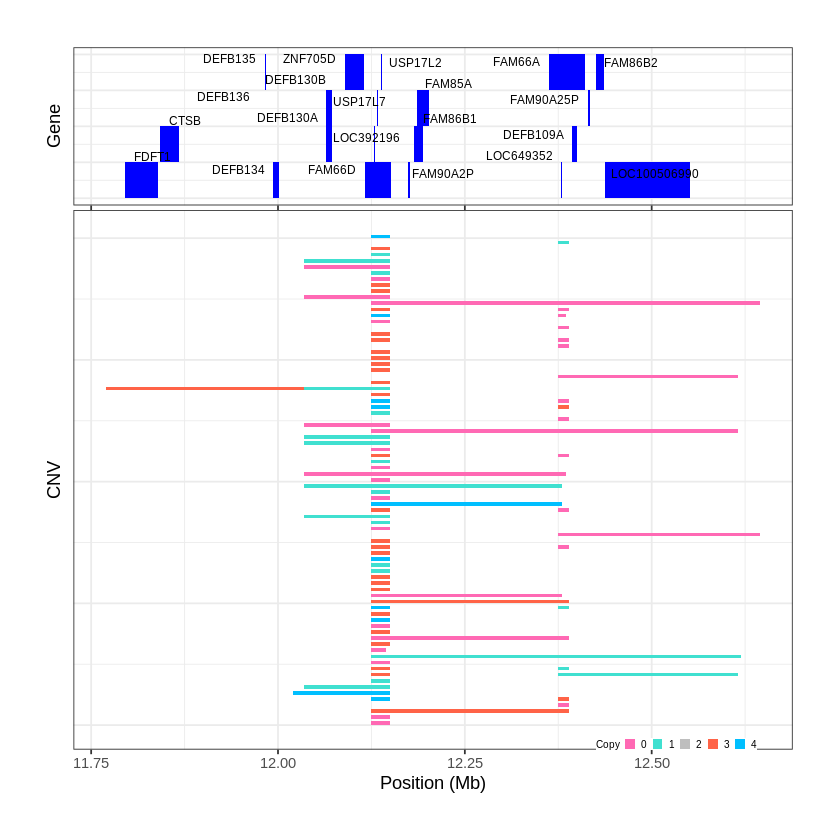

Task done, plot was stored in working directory.
[1] "Ploting CNVR 23..."
Input data passed requirment check...
[1] "CNV on Chromosome 9: 38.995001 - 43.195 Mb with 109 Individual - "
Plotting gene...


Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


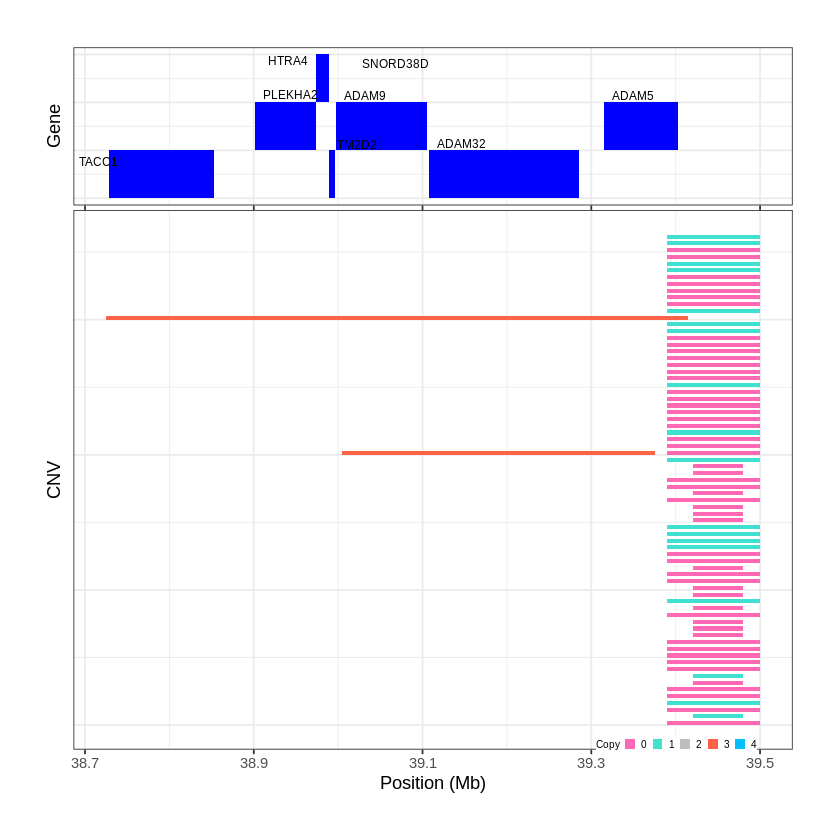

Task done, plot was stored in working directory.
[1] "Ploting CNVR 24..."
Input data passed requirment check...
[1] "CNV on Chromosome 10: 38.355001 - 42.445 Mb with 55 Individual - "
Plotting gene...


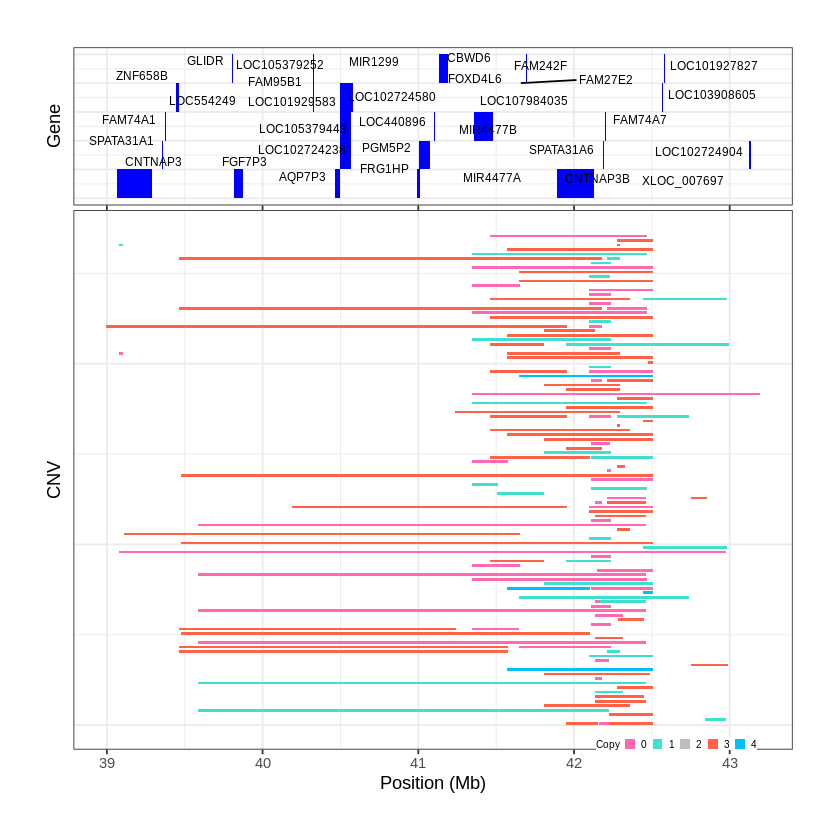

Task done, plot was stored in working directory.
[1] "Ploting CNVR 25..."
Input data passed requirment check...
[1] "CNV on Chromosome 10: 85.865001 - 89.93 Mb with 37 Individual - "
Plotting gene...


Warning message:
“ggrepel: 32 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


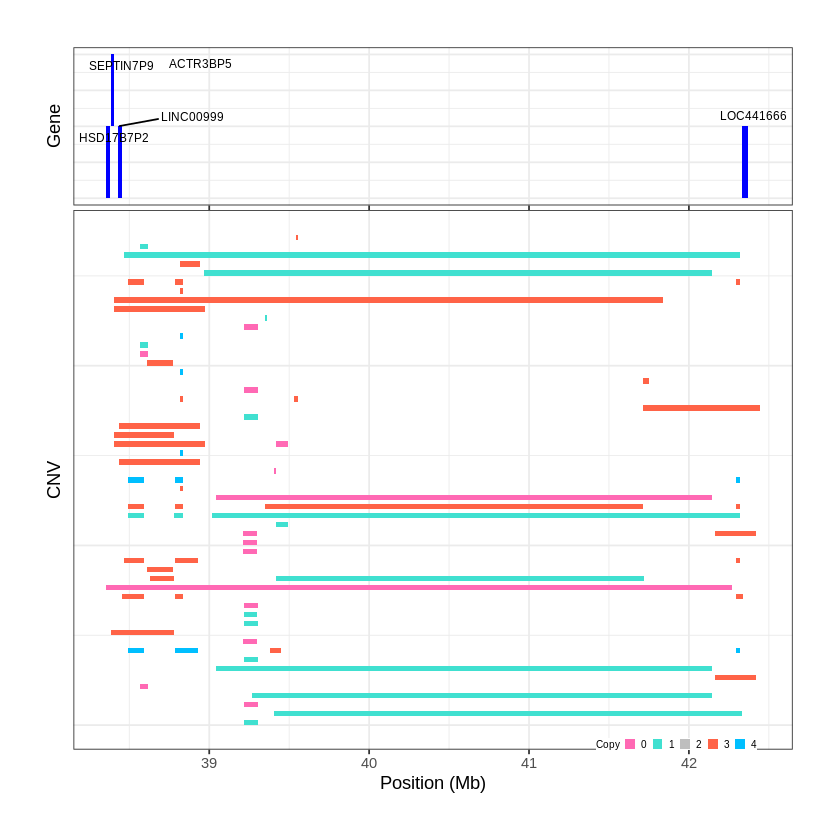

Task done, plot was stored in working directory.
[1] "Ploting CNVR 26..."
Input data passed requirment check...
[1] "CNV on Chromosome 11: 0.195001 - 4.365 Mb with 38 Individual - "
Plotting gene...


Warning message:
“ggrepel: 31 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 129 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


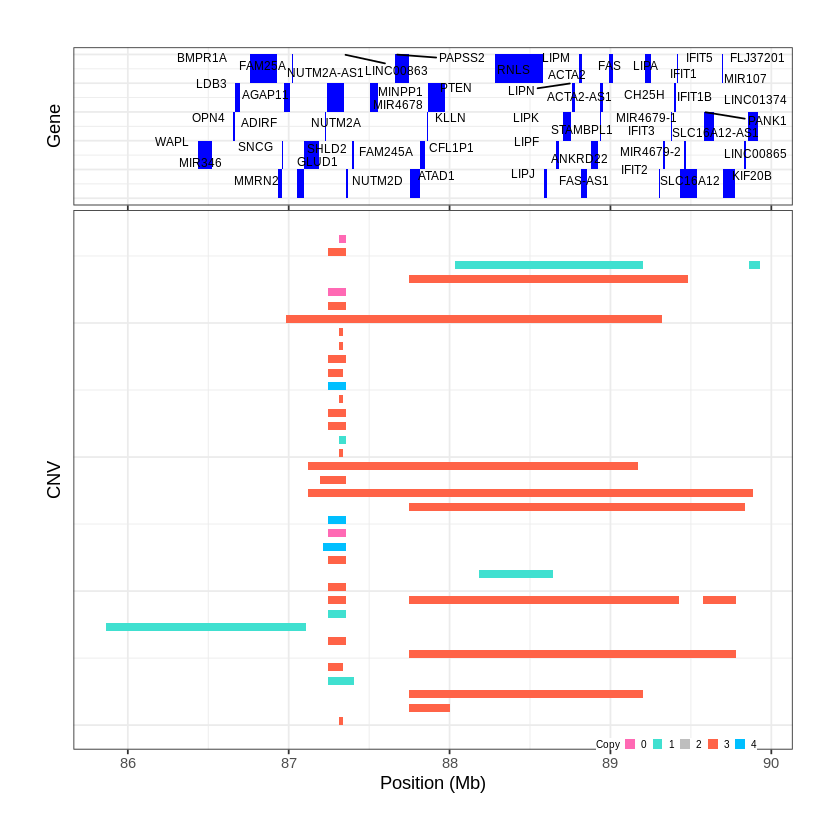

Task done, plot was stored in working directory.
[1] "Ploting CNVR 27..."
Input data passed requirment check...
[1] "CNV on Chromosome 11: 54.665001 - 55.685 Mb with 76 Individual - "
Plotting gene...
Task done, plot was stored in working directory.
[1] "Ploting CNVR 28..."
Input data passed requirment check...
[1] "CNV on Chromosome 12: 7.615001 - 13.01 Mb with 51 Individual - "
Plotting gene...


Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


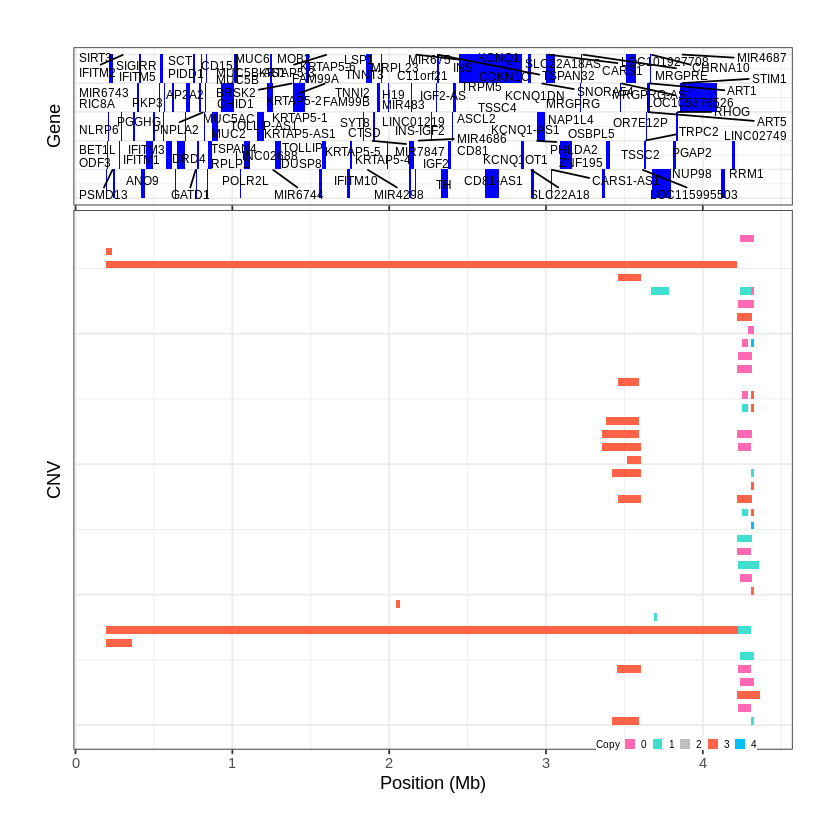

Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 124 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


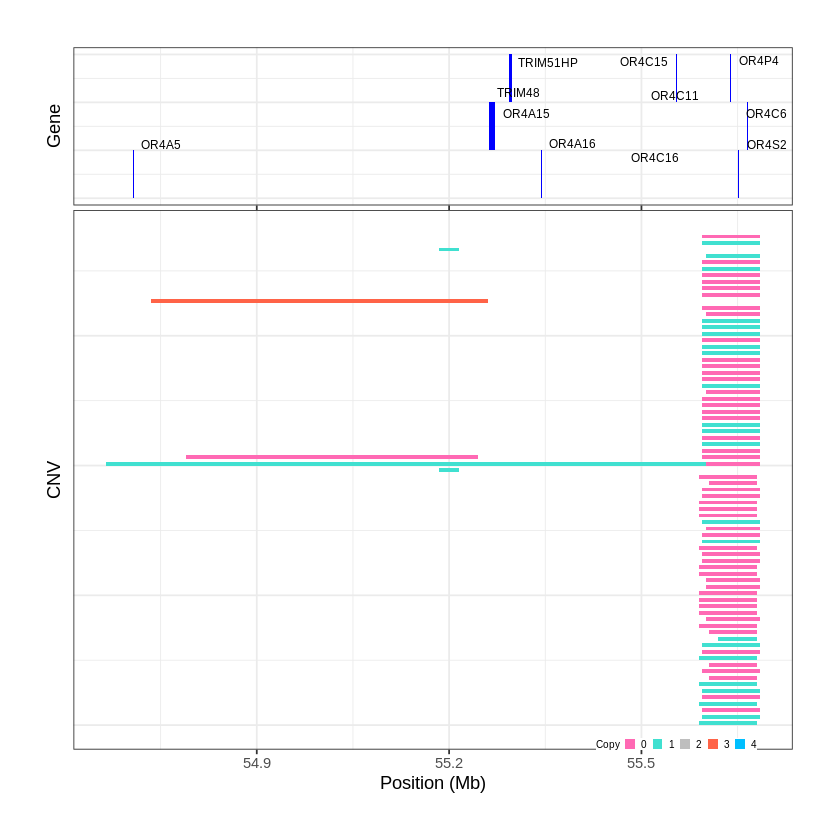

Task done, plot was stored in working directory.
[1] "Ploting CNVR 29..."
Input data passed requirment check...
[1] "CNV on Chromosome 13: 52.215001 - 52.39 Mb with 40 Individual - "
Plotting gene...
Task done, plot was stored in working directory.
[1] "Ploting CNVR 30..."
Input data passed requirment check...
[1] "CNV on Chromosome 14: 18.675001 - 19.965 Mb with 105 Individual - "
Plotting gene...


Warning message:
“ggrepel: 18 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


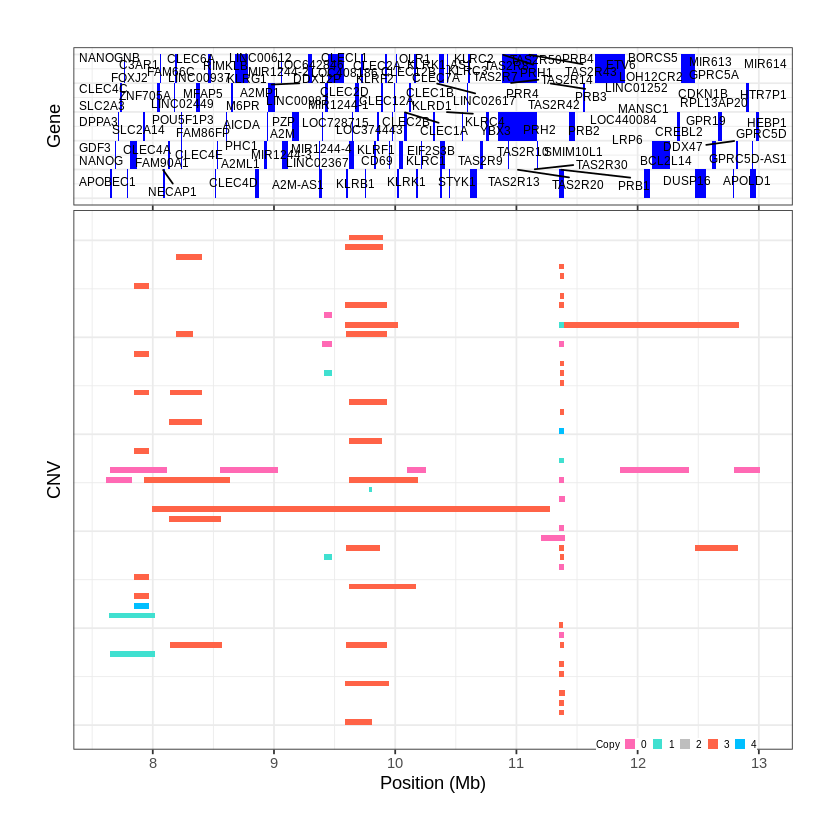

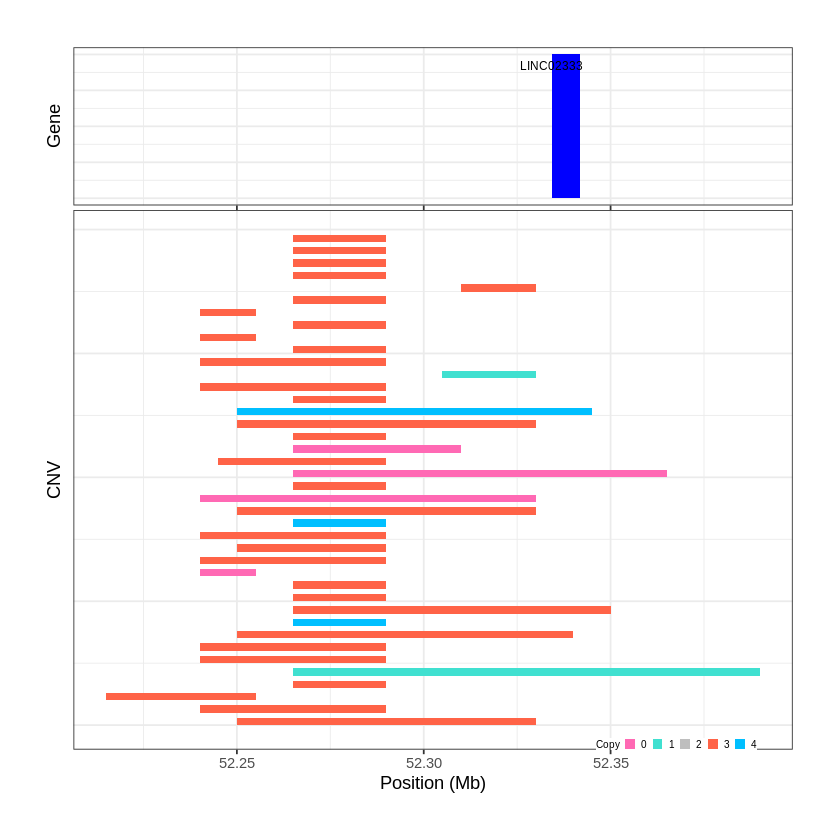

Task done, plot was stored in working directory.
[1] "Ploting CNVR 31..."
Input data passed requirment check...
[1] "CNV on Chromosome 14: 105.550001 - 106.89 Mb with 77 Individual - "
Plotting gene...


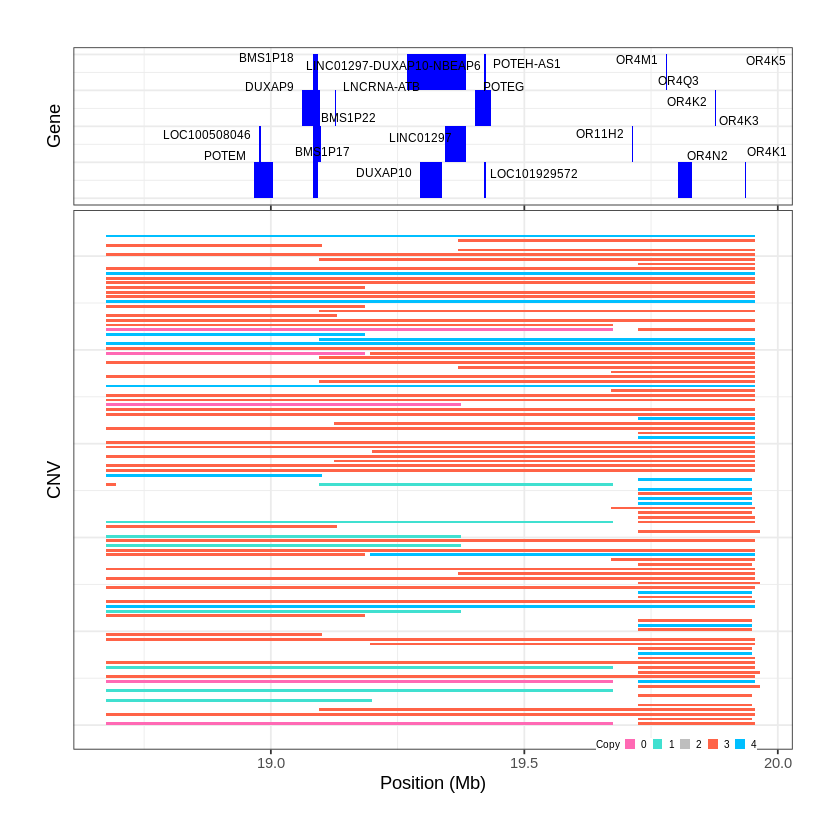

Task done, plot was stored in working directory.
[1] "Ploting CNVR 32..."
Input data passed requirment check...
[1] "CNV on Chromosome 15: 17.010001 - 23.425 Mb with 46 Individual - "
Plotting gene...


Warning message:
“ggrepel: 54 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


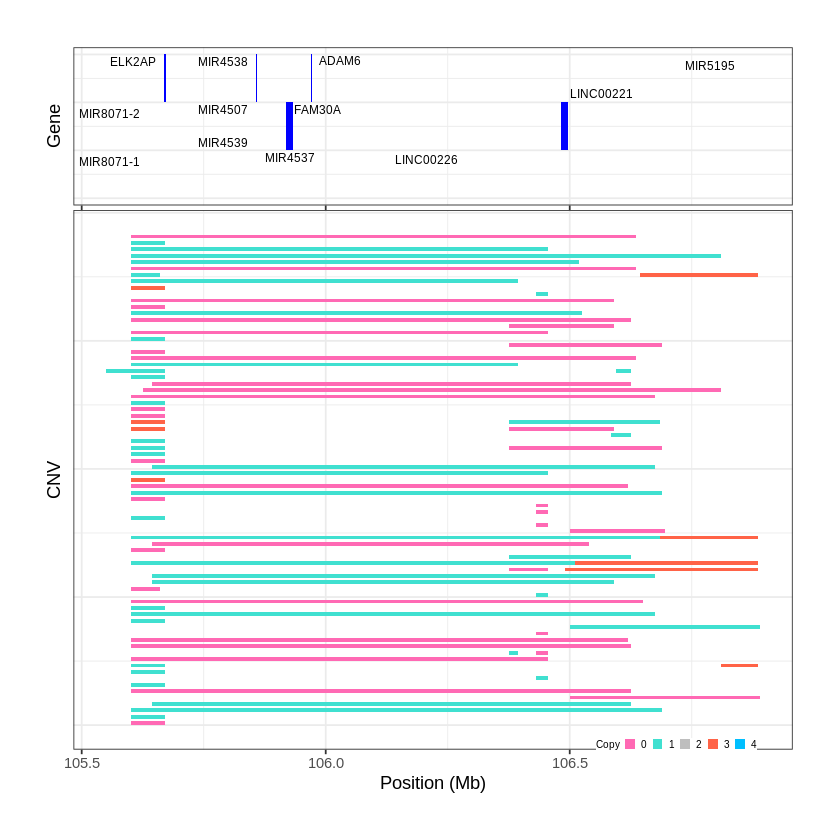

Task done, plot was stored in working directory.
[1] "Ploting CNVR 33..."
Input data passed requirment check...
[1] "CNV on Chromosome 15: 24.195001 - 24.525 Mb with 49 Individual - "
Plotting gene...
Task done, plot was stored in working directory.
[1] "Ploting CNVR 34..."
Input data passed requirment check...
[1] "CNV on Chromosome 15: 31.590001 - 32.225 Mb with 40 Individual - "
Plotting gene...
[1] "No gene in this region"


Warning message in as_grob.default(plot):
“Cannot convert object of class character into a grob.”


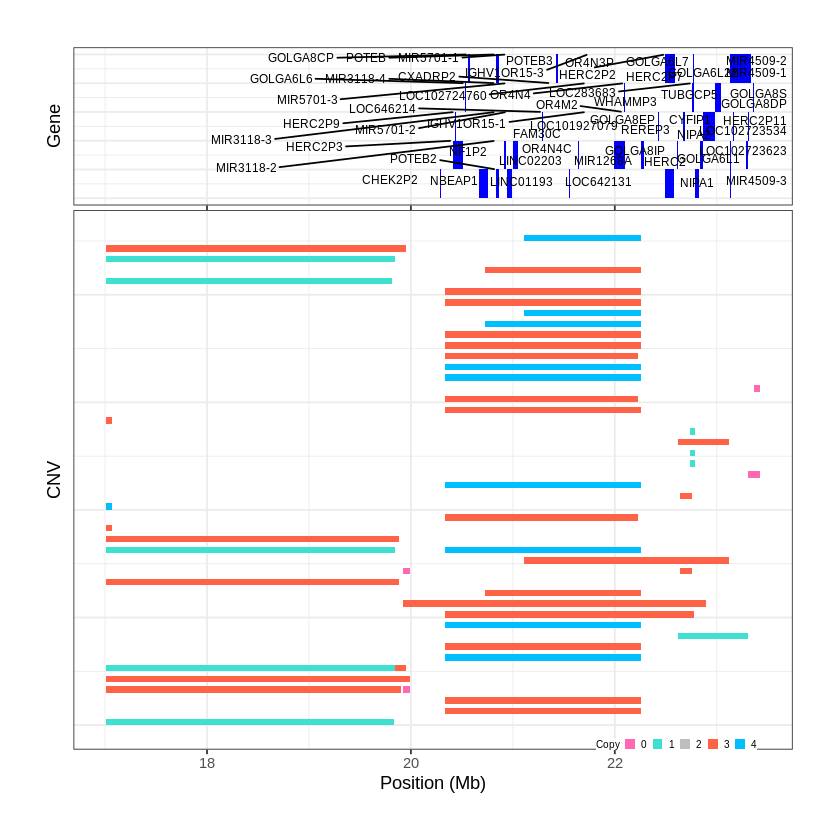

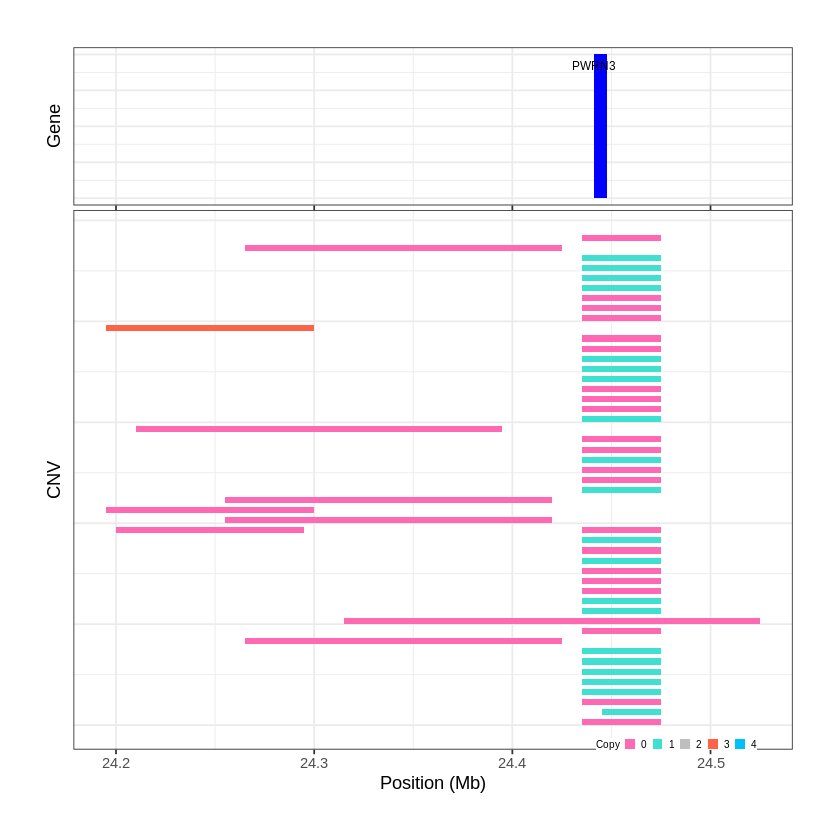

Task done, plot was stored in working directory.
[1] "Ploting CNVR 35..."
Input data passed requirment check...
[1] "CNV on Chromosome 16: 18.160001 - 18.935 Mb with 46 Individual - "
Plotting gene...


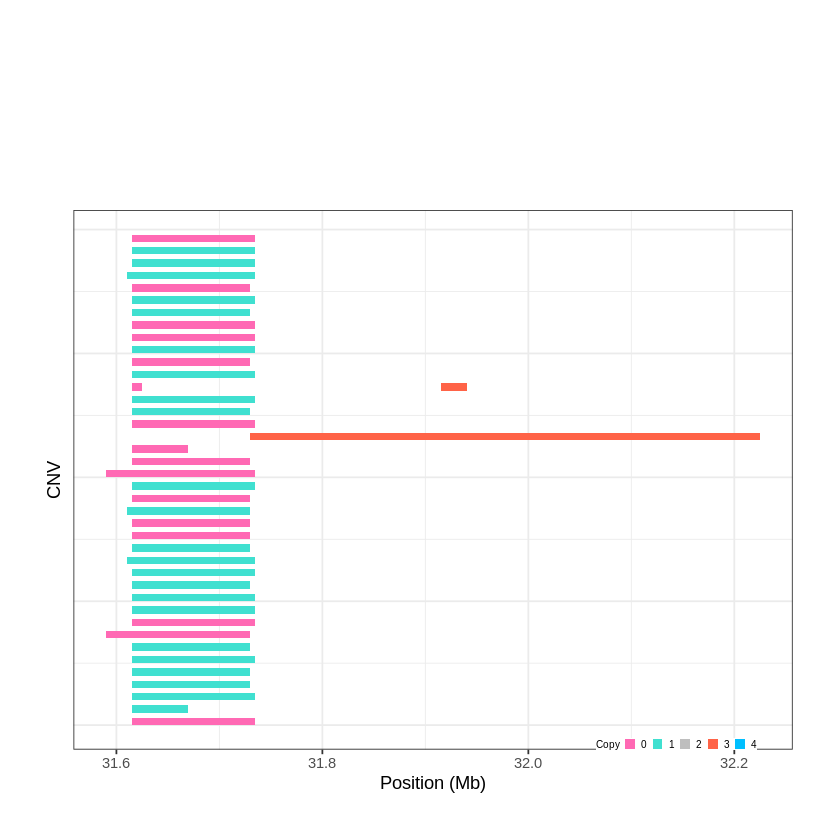

Task done, plot was stored in working directory.
[1] "Ploting CNVR 36..."
Input data passed requirment check...
[1] "CNV on Chromosome 16: 33.710001 - 36.34 Mb with 42 Individual - "
Plotting gene...


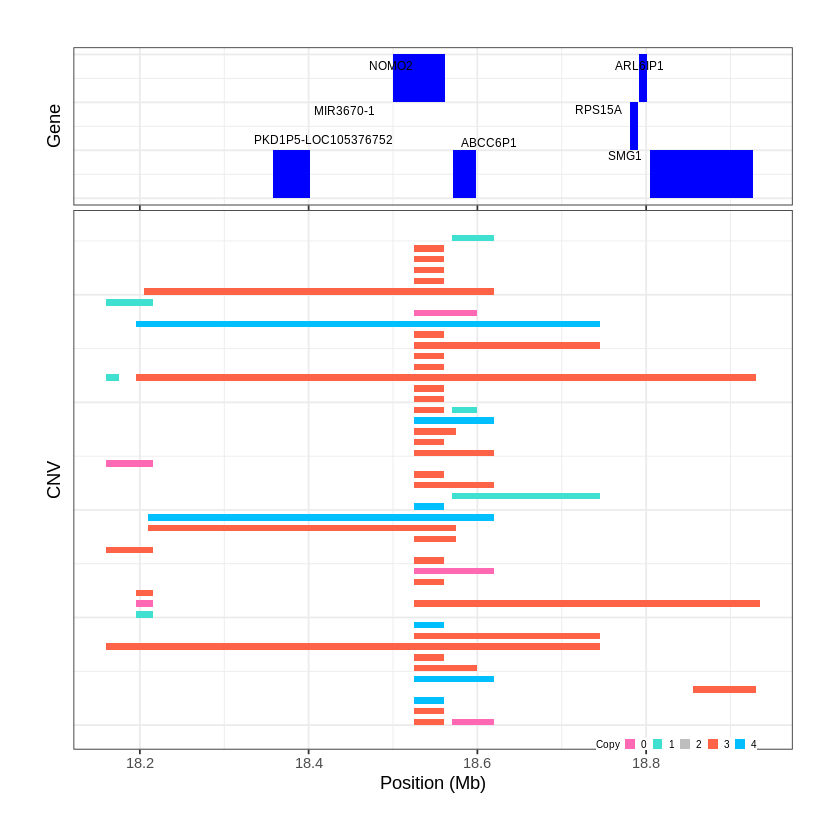

Task done, plot was stored in working directory.
[1] "Ploting CNVR 37..."
Input data passed requirment check...
[1] "CNV on Chromosome 17: 15.510001 - 18.87 Mb with 56 Individual - "
Plotting gene...


Warning message:
“ggrepel: 69 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


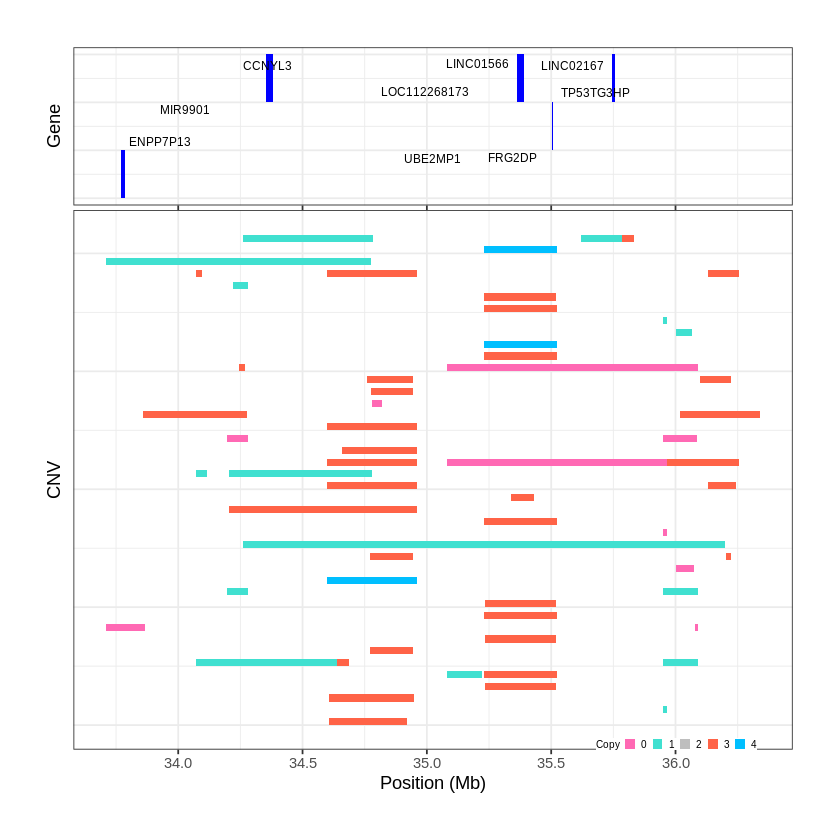

Task done, plot was stored in working directory.
[1] "Ploting CNVR 38..."
Input data passed requirment check...
[1] "CNV on Chromosome 17: 21.445001 - 27.01 Mb with 40 Individual - "
Plotting gene...


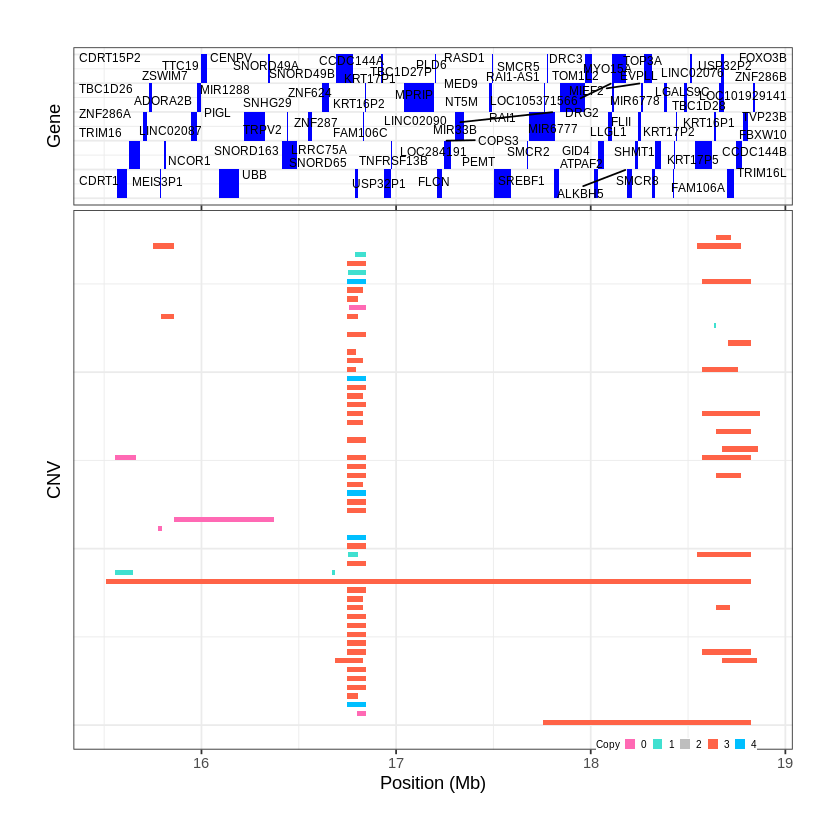

Task done, plot was stored in working directory.
[1] "Ploting CNVR 39..."
Input data passed requirment check...
[1] "CNV on Chromosome 17: 36.105001 - 36.49 Mb with 64 Individual - "
Plotting gene...


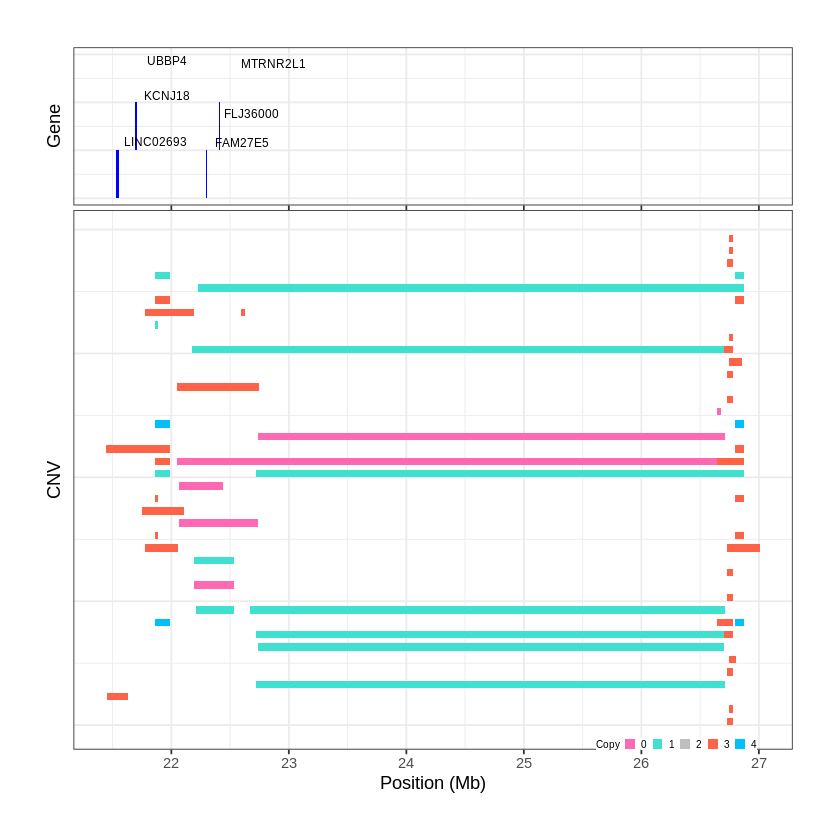

Task done, plot was stored in working directory.
[1] "Ploting CNVR 40..."
Input data passed requirment check...
[1] "CNV on Chromosome 18: 13.995001 - 15.38 Mb with 45 Individual - "
Plotting gene...


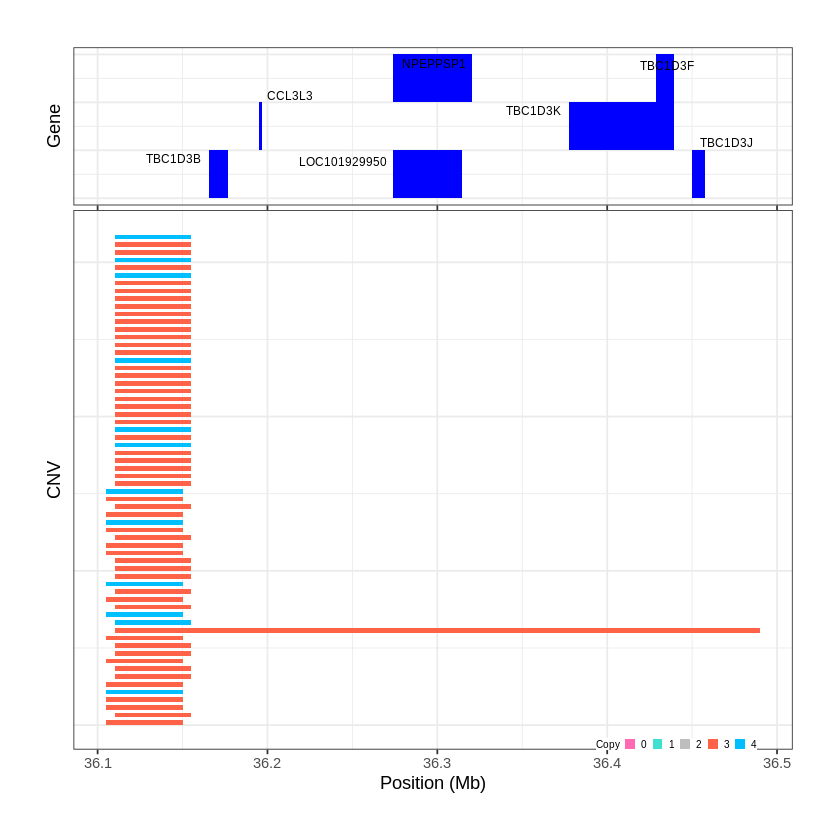

Task done, plot was stored in working directory.
[1] "Ploting CNVR 41..."
Input data passed requirment check...
[1] "CNV on Chromosome 19: 42.595001 - 43.8 Mb with 77 Individual - "
Plotting gene...


Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


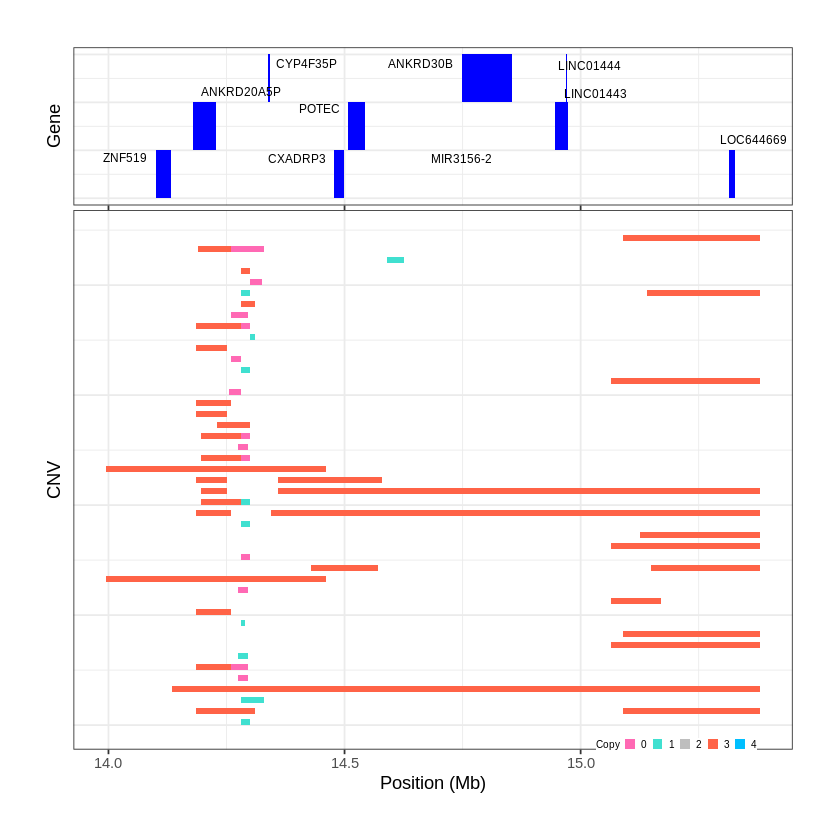

Task done, plot was stored in working directory.
[1] "Ploting CNVR 42..."
Input data passed requirment check...
[1] "CNV on Chromosome 19: 52.340001 - 55.195 Mb with 59 Individual - "
Plotting gene...


Warning message:
“ggrepel: 70 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 158 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


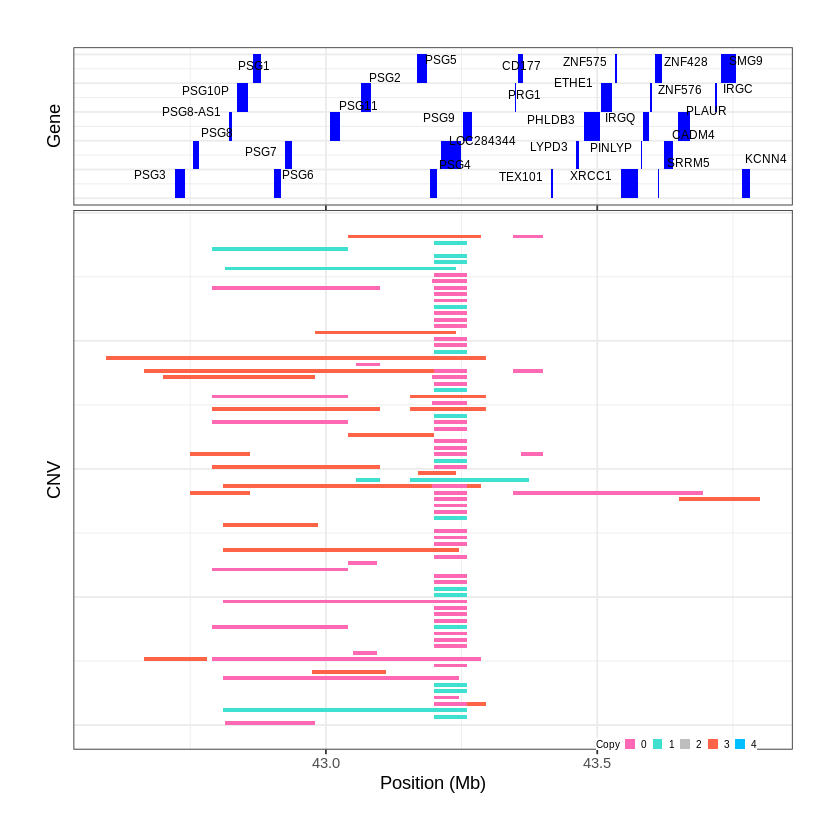

Task done, plot was stored in working directory.
[1] "Ploting CNVR 43..."
Input data passed requirment check...
[1] "CNV on Chromosome 20: 26.275001 - 32.93 Mb with 56 Individual - "
Plotting gene...


Warning message:
“ggrepel: 42 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


Task done, plot was stored in working directory.
[1] "Ploting CNVR 44..."
Input data passed requirment check...
[1] "CNV on Chromosome 22: 38.855001 - 43.01 Mb with 78 Individual - "
Plotting gene...


Warning message:
“ggrepel: 69 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


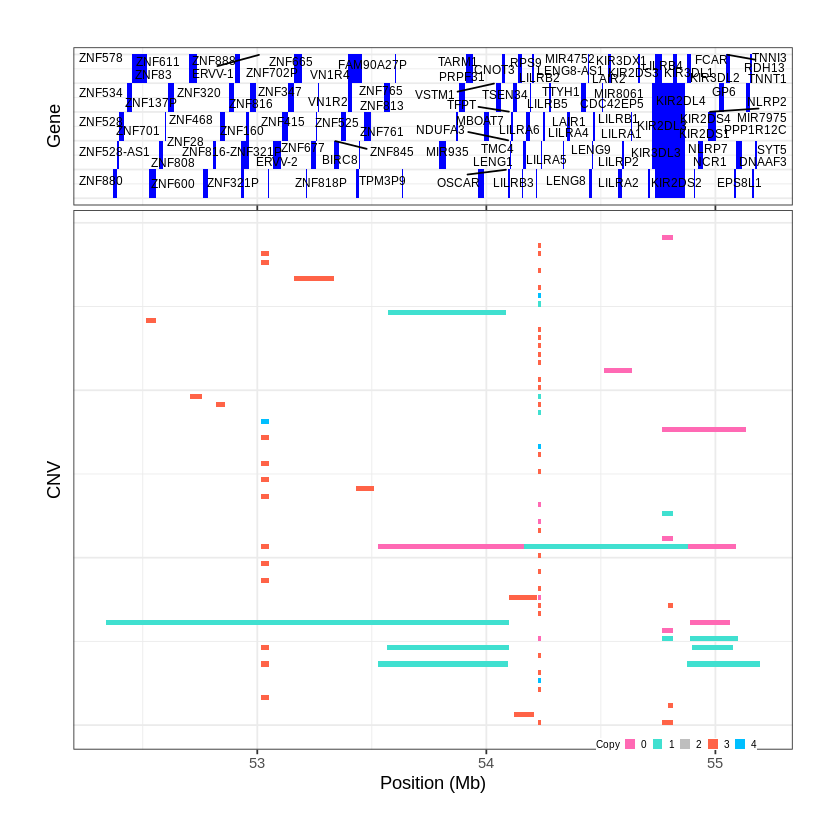

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 97 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


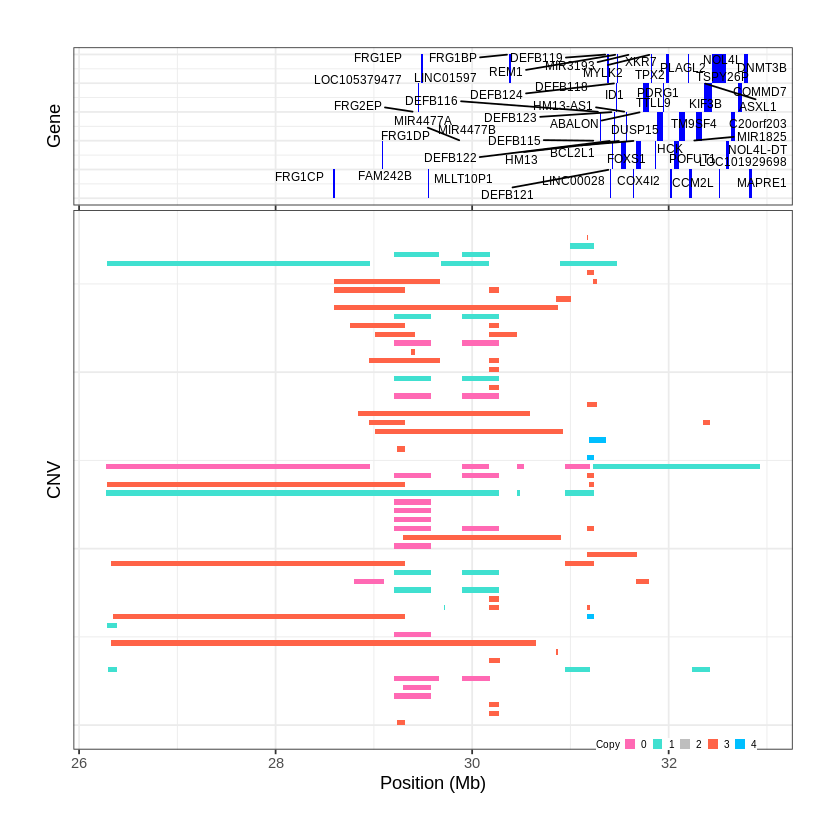

Task done, plot was stored in working directory.


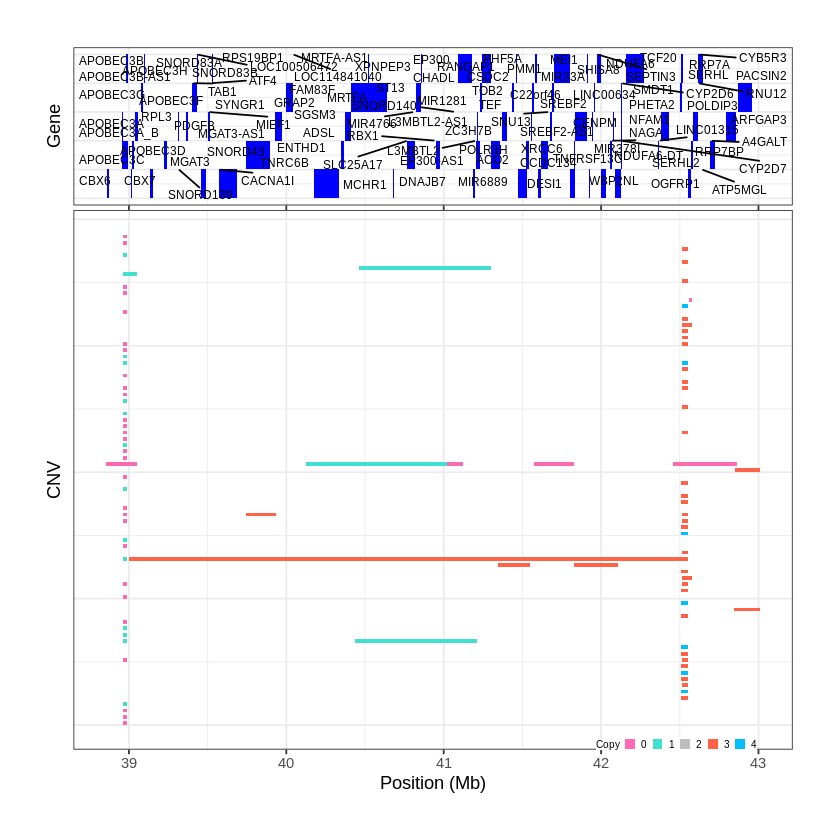

In [16]:
cnvr_plot(cnvr = "cnvr_cnvnator/cnvr.txt", #standard file was generated by 'call_cnvr' function in section 4
          clean_cnv = "cnv_clean/cleancnv.cnv", #standard file was generated by 'cnv_clean' function in section 1
          refgene = "refgene/Human_hg38.txt", #standard file was generated by 'get_refgene' function in section 5.1
          sample_size = 122, #total sample size
          common_cnv_threshold = 0.3, #the CNV frequency threshold
          width_1 = 10, #optional, adjust the width of final plot
          height_1 = 10, #optional, adjust the height of final plot
          col_gene = "blue", #optional, adjust the colour of annotated genes
          gene_font_size = 2.5, #optional, adjust the font size of annotated gene names
          folder = "high_freq_cnvr_cnvnator")

In [17]:
cnv_visual(clean_cnv = "call_gene_CNVNator_Hg38/cnv_annotation.txt", #here we need the annotated CNV list, generated by 'call_gene' in section 5.2
           target_gene = "AKNAD1", #set the gene name we are interested in
           col_0 = "darkorchid4",  #optional, customize colour for o copy CNV 
           col_1 = "dodgerblue3",  #optional, customize colour for 1 copy CNV 
           col_3 = "violetred3",  #optional, customize colour for 3 copy CNV 
           col_4 = "orangered3",  #optional, customize colour for 4 copy CNV
           width_1 = 13, #adjust the width of final plot
           height_1 = 10, #adjust the width of final plot
           folder = "cnv_visual")

Renamed 'CNV_Start' and 'CNV_End' as 'Start' and 'End', input data passed requirment check...


ERROR: Error in seq.default(1, nrow(id_coord), 1): wrong sign in 'by' argument


<h1> CNVR analysis 

In [ ]:
individual_cnv_cnvr <- read.table("/branchinecta/jbazanwilliamson/cnvr_cnvnator/individual_cnv_cnvr.txt", header=TRUE)

individual_cnv_cnvr

In [ ]:
CNVR_cnvnator <- dcast(individual_cnv_cnvr, CNVR_ID ~ Sample_ID, value.var="CNV_Value", fun.aggregate=mean)
CNVR_cnvnator

In [138]:
dt = as.data.table(cnv) # or convert in place using setDT

dt = dt[, .(Start = min(Start), End = max(End), CNV_Value = CNV_Value[1])
   , by = .(Sample_ID, Chr, rleid(CNV_Value),
            cumsum(c(FALSE, head(End + 500, -1) < tail(Start, -1))))]

In [131]:
cnv[order(cnv$Chr, cnv$Start, cnv$End),]

,Sample_ID,Chr,Start,End,CNV_Value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,LP6005441-DNA_A01,1,1,10000,1
5613,LP6005441-DNA_A03,1,1,10000,1
11022,LP6005441-DNA_A04,1,1,10000,1
17154,LP6005441-DNA_A05,1,1,10000,1
23718,LP6005441-DNA_A06,1,1,10000,1
32753,LP6005441-DNA_A08,1,1,10000,1
38791,LP6005441-DNA_A09,1,1,10000,1
43808,LP6005441-DNA_A10,1,1,10000,1
48764,LP6005441-DNA_A11,1,1,10000,1


In [132]:
dt[order(dt$Chr, dt$Start, dt$End),]

Sample_ID,Chr,rleid,cumsum,Start,End,CNV_Value
<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
LP6005441-DNA_A01,1,1,0,1,10000,1
LP6005441-DNA_A03,1,915,5289,1,10000,1
LP6005441-DNA_A04,1,1953,10429,1,10000,1
LP6005441-DNA_A05,1,2935,16273,1,10000,1
LP6005441-DNA_A06,1,4029,22533,1,10000,1
LP6005441-DNA_A08,1,5107,31130,1,10000,1
LP6005441-DNA_A09,1,6211,36907,1,10000,1
LP6005441-DNA_A10,1,7097,41698,1,10000,1
LP6005441-DNA_A11,1,8043,46429,1,10000,1


In [137]:
dt %>%
  pivot_wider(names_from =Sample_ID, values_from = CNV_Value)

Warning message:
“Values from `CNV_Value` are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = {summary_fun}` to summarise duplicates.
* Use the following dplyr code to identify duplicates.
  {data} %>%
    dplyr::group_by(Chr, rleid, cumsum, Start, End, Sample_ID) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)”


Chr,rleid,cumsum,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,⋯,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
<dbl>,<int>,<int>,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,1,0,1,10000,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,2,1,11601,18400,3,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,2,39901,48200,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,3,49001,49700,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,4,51201,65000,"1, 1",NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,5,69401,70900,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,6,71801,92900,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,7,98001,100000,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,8,100601,104200,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL


In [139]:
result = dcast(dt, Chr + Start + End ~ Sample_ID, value.var="CNV_Value", fun.aggregate=sum)

In [117]:
#result[order(result$Chr, result$Start, result$End),] #100

,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,⋯,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,10000,1,1,1,1,1,1,1,⋯,1,0,1,1,1,1,1,0,1,1
81014,1,1,11600,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
775800,1,10501,11000,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
754917,1,10501,11200,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
202822,1,10501,11500,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
513811,1,10501,11600,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
197487,1,10701,11100,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
616002,1,10701,11200,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
152730,1,10701,11600,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [153]:
dt = as.data.table(cnv) # or convert in place using setDT

dt = dt[, .(Start = min(Start), End = max(End))#, CNV_Value = CNV_Value[1])
   , by = .(Sample_ID, Chr, CNV_Value,
            cumsum(c(FALSE, head(End + 300, 1) < tail(Start, -1))))]

In [155]:
result = dcast(dt, Chr + Start + End ~ Sample_ID, value.var="CNV_Value", fun.aggregate=sum)

In [156]:
result[order(result$Chr, result$Start, result$End),]

,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,⋯,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,10000,1,1,1,1,1,1,1,⋯,1,0,1,1,1,1,1,0,1,1
81049,1,1,11600,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
776136,1,10501,11000,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
755252,1,10501,11200,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
202901,1,10501,11500,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
514053,1,10501,11600,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
197565,1,10701,11100,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
616299,1,10701,11200,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
152794,1,10701,11600,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
